# Анализ бизнес-показателей приложения Procrastinate Pro+

# Оглавнение

1) [Введение](#header_1)

1.1 [Описание проекта](#header_2)

1.2 [Описание данных](#header_3)

2) [Предобработка данных](#header_4)

2.1 [Изменение названий столбцов](#header_5)

2.2 [Поиск и обработка дубликатов](#header_6)

2.3 [Приведение данных к нужному типу](#header_7)

3) [Создание фунций для расчета и визуализации LTV, ROI, конверсии и удержания](#header_8)

4) [Исследовательский анализ данных](#header_9)

4.1 [Создание профилей пользователей](#header_10)

4.2 [Минимальная и максимальная даты привлечения пользователей](#header_11)

4.3 [Страны, из которых приходят пользователи](#header_12)

4.4 [Устройства, которые используют пользователи](#header_13)

4.5 [Каналы, из которых приходят пользователи](#header_14)

5) [Маркетинг](#header_15)

5.1 [Общая сумма расходов на маркетинг](#header_16)

5.2 [Распределение рекламных трат по разным каналам](#header_17)

5.3 [Динамика изменения рекламных расходов во времени](#header_18)

5.4 [Средняя стоимость привлечения пользователей из разных источников](#header_19)

6) [Анализ окупаемости рекламы](#header_20)

6.1 [Момент и горизонт анализа](#header_21)

6.2 [Окупаемость рекламы в целом](#header_22)

6.3 [Окупаемость рекламы для разных устройств](#header_23)

6.4 [Окупаемость рекламы в разных странах](#header_24)

6.5 [Окупаемость рекламы в разных каналах привлечения](#header_25)

7) [Выводы](#header_26)

8) [Выводы по всем этапам исследования](#header_27)


## Введение
<a id='header_1'></a>

### Описание проекта
<a id='header_2'></a>

   **Данный проект посвящен исследованию бизнес-показателей развлекательного приложения Procrastinate Pro+. Несмотря на большие вложения в рекламу, компания терпит убытки.**
 
 **Целью исследования является поиск причин убытков и предложение точек роста, которые помогут компании выйти в плюс.**

Исследование будет проводится на основе данных о сессиях и покупках пользователей, которые присоединились к приложению в период с 1 мая по 27 октября 2019 года, а также рекламных расходах компании за данный период.

В нашем распоряжении имеется 3 датасета:

  **Журнал сессий со следующими параметрами:**

User Id — уникальный идентификатор пользователя,

Region — страна пользователя,

Device — тип устройства пользователя,

Channel — идентификатор источника перехода,

Session Start — дата и время начала сессии,

Session End — дата и время окончания сессии.


  **Датасет с данными о покупках пользователей, привлеченных в этот период, со следующими параметрами:**

User Id — уникальный идентификатор пользователя,

Event Dt — дата и время покупки,

Revenue — сумма заказа.


  **Датасет с расходами на рекламу со следующими параметрами:**

User Id — уникальный идентификатор пользователя,

Event Dt — дата и время покупки,

Revenue — сумма заказа.



### Описание данных
<a id='header_3'></a>

In [123]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [124]:
# загружаем датафреймы с журналом сессий, покупками и тратами на рекламу в переменные
visits, orders, costs = (
    pd.read_csv('/datasets/v'),
    pd.read_csv('/datasets/o'),
    pd.read_csv('/datasets/s'),
)

In [125]:
# посмотрим на данные датасета с сессиями
visits.sample(1)

User Id         Region  Device Channel        Session Start  \
106420  991100700034  United States  iPhone  TipTop  2019-08-12 10:55:56   

                Session End  
106420  2019-08-12 11:41:12

In [126]:
# смотрим на данные датасета с покупками
orders.head(1)

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99

In [127]:
# смотрим на данные датасета с расходами на рекламу
costs.tail(1)

dt         Channel  costs
1799  2019-10-27  lambdaMediaAds   12.0

In [128]:
# ознакомимся с информацией по датасету с сессиями
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [129]:
# ознакомимся с информацией по датасету с заказами
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [130]:
# так же смотрим на описание датасета с расходами на рекламу
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Исследование будет проводиться на основе 3 датасетов: с сессиями - visits, покупками - orders, и расходами на рекламу - costs. 


Количество строк и столбцов с датасетах:

**visits**: 309901 строки и 6 столбцов,

**orders**: 40212 строк и 3 столбца,

**costs**: 1800 строк и 3 столбца.


Знакомство с данными позволило заметить проблемы, которые предстоит решить на этапе предобработки данных: неправильные регистр, наличие пробелов и неподходящий тип данных в некоторых колонках. 

**Пропуски в данных не обнаружены.**

## Предобработка данных
<a id='header_4'></a>

### Изменение названий столбцов
<a id='header_5'></a>

Для корректного вида все названия столбцов должны быть в нижнем регистре, а также не иметь пробелов. 

In [131]:
# приведем названия столбцов во всех датасетах к нижнему регистру
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [132]:
# проверям изменения
display(visits.head(1))
display(orders.head(1))
costs.head(1)

user id         region  device  channel        session start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   

           session end  
0  2019-05-01 02:45:01

user id             event dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99

dt   channel  costs
0  2019-05-01  FaceBoom  113.3

In [133]:
# Заменим пробелы в названиях нижним подчеркиванием
visits = visits.rename(columns={'user id':'user_id','session start':'session_start', 'session end':'session_end'})

In [134]:
# проверяем корректность изменений
visits.head(1)

user_id         region  device  channel        session_start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   

           session_end  
0  2019-05-01 02:45:01

In [135]:
# делаем то же самое с датасетом orders
orders = orders.rename(columns={'user id':'user_id','event dt':'event_dt'})

In [136]:
# проверяем
orders.head(1)

user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99

### Поиск и обработка дубликатов
<a id='header_6'></a>

In [137]:
# ищем явные дубликаты в датасете visits
visits.duplicated().sum()


0

In [138]:
# делаем то же самое для датасета orders
orders.duplicated().sum()

0

In [139]:
# проверка на наличие явных дубликатов датасета costs
costs.duplicated().sum()

0

In [140]:
# ищем неявные дубликаты в текстовых столбцах
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [141]:
# ищем неявные дубликаты в текстовых столбцах
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [142]:
# ищем неявные дубликаты в текстовых столбцах
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [143]:
# ищем неявные дубликаты в текстовых столбцах
costs['channel'].value_counts()

AdNonSense            180
YRabbit               180
OppleCreativeMedia    180
TipTop                180
WahooNetBanner        180
lambdaMediaAds        180
FaceBoom              180
RocketSuperAds        180
LeapBob               180
MediaTornado          180
Name: channel, dtype: int64

В ходе проверки датасетов на наличие дубликатов не было выявлено проблем. Отсутствуют как явные, так и неявные дубликаты.

### Приведение данных к нужному типу
<a id='header_7'></a>

Данные в столбцах, которые содержат дату и время, сейчас имеют строковый тип object. Для дальнейшей работы изменим тип на datetime

In [144]:
# приведем столбец session_start фрейма visits к типу datetime

for c in ['session_start','session_end']:
    visits[c] = pd.to_datetime(visits[c])


In [145]:
# проверяем внесенные изменения
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [146]:
# приводим к типу datetime столбей event_dt в фрейме orders
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [147]:
# проверяем
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [148]:
# приводим к типу datetime столбец dt в фрейме costs
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [149]:
# проверяем изменения
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Мы провели предобработку данных, в рамках которой были устранены следующие проблемы:

- некорректные названия столбцов приведены к змеиному регистру
- в столбцах, содержащих данные о дате и времени, изменен тип данных на тип datetime

Пропуски и дубликаты не были обнаружены.

## Создание фунций для расчета и визуализации LTV, ROI, конверсии и удержания
<a id='header_8'></a>

**Для дальнейшей работы создадим собственные функции для расчета интересующих нас метрик:**

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта удержания и его динамики,
- `get_conversion()` — для подсчёта конверсии и его динамики,
- `get_ltv()` — для подсчёта LTV и ROI, а такде их динамики.

Таблицы удержания, конверсии и LTV+ROI позволяют посмотреть на значение метрик в разные лайфтаймы, разделяя пользователей на произвольные когорты. Таблицы динамики позволяют отследить изменения значений метрик в один и тот же лайфтайм, но для когорт, привлеченных в разные дни.

Также создадим собственные функции для визуализации полученных таблиц:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика удержания и его динамики,
- `plot_conversion()` — для построения графика конверсии и ее динамики,
- `plot_ltv_roi()` — для визуализации LTV и ROI и их динамики.


In [150]:
# объявляем фунцию для создания профилей пользователей


def get_profiles(sessions, orders, ad_costs):
    
    """Функция принимает датасеты с сессиями, заказами,
    затратами на рекламу. На выходе пользовательские профили будут включать
    в себя пользовательский айди, устройство, канал и регион первого входа в приложение, дату и время,
    отдельно дату и месяц первой сессии, а также затраты на привлечение пользователя
    """
 
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
 
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = pd.to_datetime(profiles['first_ts']).dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
 
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
 
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
 
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
 
    )
 
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
 
    return profiles

In [151]:
# объявляем функцию для подсчета коэффициента удержания и динамики удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    """
    Функция принимает датасеты с профилями и сессиями пользователей, 
    момент и горизонт анализа данных, а также список признаков для группировки. 
    По умолчанию пользователи делятся на платящих и неплатящих, так как показатели удержания этих групп, как правило, 
    сильно отличаются

    """

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [152]:
# объявляем функцию для расчета конверсии и динамики конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    """
    Она принимает датасеты с профилями и покупками пользователей, момент и горизонт анализа данных,
    а также список признаков для группировки. 
    
    """

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [153]:
# объявляем функцию для подсчета LTV и ROI, а также динамики этих метрик

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    """
    Функция принимает датасеты с профилями и покупками пользователей, 
    момент и горизонт анализа данных,а также список признаков для группировки.
    
    """

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  
        result_grouped,  
        result_in_time,  
        roi_grouped,  
        roi_in_time,  
    ) 

In [154]:
# объявляем функцию для сглаживания датафрейма (она необходима для избавления от шумов на графиках).


def filter_data(df, window):
    
    """
    Функция принимает на вход датафрейм и число, обозначающее требуемое окно сглаживания
    
    """
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [155]:
# объявляем функцию для визуализации удержания и динамики удержания. Функция принримает датафреймы с удержанием
# и динаимикой удержания, горизонт анализа, а также значение окна сглаживания.

def plot_retention(retention, retention_history, horizon, window=7):
    
    """
    Функция принримает датафреймы с удержанием и динаимикой удержания, горизонт анализа, 
    а также значение окна сглаживания
    
    """

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [156]:
# объявляем функцию для визуализации конверсии и динамики конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):
    
    """
    Функция принимает датафреймы с конверсией и динамикой конверсии, 
    горизонт анализа и значение окна сглаживания
    
    """

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [157]:
# объявляем функцию для визуализации LTV, динамики LTV, ROI и динамики ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    
    """
    Функция принимает датафреймы с LTV, динамикой LTV, ROI и динамикой ROI
    
    """

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.xticks(fontsize=8)
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.xticks(fontsize=8)
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.xticks(fontsize=9)
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных
<a id='header_9'></a>

Далее исследуем профили пользователей. Особое внимание будем уделять платящим, поскольку для успешности бизнеса важны именно они. Для этого изучим:

- Минимальную и максимальную даты привлечения, чтобы понимать, когда привлекались новые пользователи, попавшие в исследование

- Страны, из которых приходят пользователи, и из какой страны больше всего платящих

- Устройства, которыми пользуются пользователи, и какие из устройств предпочитают платящие пользователи

- Рекламные источники привлечения, какое количество пользователей они приводят, и какие каналы обеспечивают бизнесу больше всего платящих юзеров

### Создание профилей пользователей
<a id='header_10'></a>

In [158]:
# получаем профили пользователей с помощью функции get_profiles
profiles = get_profiles(visits, orders, costs)
profiles.head(1)

user_id            first_ts   channel device         region          dt  \
0   599326 2019-05-07 20:58:57  FaceBoom    Mac  United States  2019-05-07   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172

### Минимальная и максимальная даты привлечения пользователей
<a id='header_11'></a>

In [159]:
# находим минимальную и максимальную даты привлечения пользователей
min_aquisition_date = profiles['first_ts'].min()
max_aquisition_date = profiles['first_ts'].max()

f'Минимальная дата привлечения: {min_aquisition_date}; максимальная дата привлечения: {max_aquisition_date}'

'Минимальная дата привлечения: 2019-05-01 00:00:41; максимальная дата привлечения: 2019-10-27 23:59:04'

Нам доступны данные о пользователях привлеченных в период с 1 мая по 27 октября 2019 года. Соответственно, среди пользователей есть те, кто "прожил" в приложении почти полгода, так и те, кто присоединился совсем недавно.

### Страны, из которых приходят пользователи
<a id='header_12'></a>

Поскольку далее мы будем исследовать количество пользователей, принадлежащих к определенной группе: пользователи из разных стран, с разными устройствами, перешедшие из разных источников - будет полезно написать собственную функцию для построения таблицы, подсчитывающей количество пользователей из каждой группы (из разных стран/пользователи разных устройств/пришедших из разных источников), а также долю платящих пользователей в каждой из этих групп.

In [160]:
# создаем функцию для построения сводной таблицы, подсчитвающей количество всех пользователей 
# и долю платящих пользователей в каждой группе

def criteria_grouping(data, criteria):
    
    """
    Она будет принимать датасет с профилями и критерий для группировки
    
    """
    payers_count = profiles.query('payer == True')['user_id'].count()
    result = data.groupby(criteria).agg({'user_id':'nunique', 'payer':'sum'}).rename(columns={'user_id':'unique_users', 'payer':'payers_rate'})

    result['payers_rate'] = round(result['payers_rate']/payers_count, 2) * 100
    
    result = result.sort_values(by='payers_rate', ascending=False).reset_index()
    return result

In [161]:
# построим таблицу, которая продемонстрирует количество пользователей из разных стран 
# вместе с долей платящих пользователей

regional_payers_rate = criteria_grouping(profiles, 'region')
regional_payers_rate.columns = ['Страна','Количество уникальных пользователей','Доля платящих в %']
regional_payers_rate

Страна  Количество уникальных пользователей  Доля платящих в %
0  United States                               100002               78.0
1             UK                                17575                8.0
2         France                                17450                7.0
3        Germany                                14981                7.0

За рассматриваемый период к приложению присоединились пользователи из 4 стран: США, Великобритании, Франции и Германии. По количеству пользователей однозначно лидируют США, остальные страны заметно отстают.
- США - 100 002 пользователя
- Великобритания - 17 575 пользователей
- Франция - 17 450 пользователей из Франции и 
- Германия - 14981 пользователь

Доля платящих пользователей наиболее высокая также в США. 
- в США - 78%
- в Великобритании - 8%
- во Франции - 7%
- в Германии - 7% 

Судя по этим данным, В США ситуация обстоит лучше всего: больше всего новых пользователей и самый высокая доля покупателей. Остальные страны показывают худшие результаты. 

### Устройства, которые используют пользователи
<a id='header_13'></a>

In [162]:
# построим таблицу, отражающую количество пользователей, которые используют разные устройства, а также
# долю платящих пользователей для каждого устройства

device_payers_rate = criteria_grouping(profiles, 'device')
device_payers_rate.columns = ['Устройство', 'Количество уникальных пользователей', 'Доля платящих в %']
device_payers_rate

Устройство  Количество уникальных пользователей  Доля платящих в %
0     iPhone                                54479               38.0
1    Android                                35032               23.0
2        Mac                                30042               22.0
3         PC                                30455               17.0

Среди пользователей приложения наибольшей популярностью пользуются Iphone, остальные устройства менее популярны.

- IPhone - 54 479 пользователей
- Android - 35 032 пользователя
- Mac - 30042 пользователя 
- PC -  30455 пользователей

Среди устройств, предпочитаемых платящими пользователями также лидирует IPhone: почти 40% отдают предпочтения именно этому девайсу. Распределение устройств среди платящих:
- IPhone - 38%
- Android - 23%
- Mac - 22%
- PC - 17%


### Каналы, из которых приходят пользователи
<a id='header_14'></a>

In [163]:
# построим таблицу, которая будет отражать количество пользователей, перешедших в приложение из разных источников
# привлечения в том числе органически, а также долю платящих пользователей для каждого источника

channel_payers_rate = criteria_grouping(profiles, 'channel')
channel_payers_rate.columns = ['Канал привлечения', 'Количество уникальных пользователей', 'Доля платящих %']
channel_payers_rate

Канал привлечения  Количество уникальных пользователей  Доля платящих %
0             FaceBoom                                29144             40.0
1               TipTop                                19561             21.0
2              organic                                56439             13.0
3           AdNonSense                                 3880              5.0
4       WahooNetBanner                                 8553              5.0
5       RocketSuperAds                                 4448              4.0
6              LeapBob                                 8553              3.0
7   OppleCreativeMedia                                 8605              3.0
8       lambdaMediaAds                                 2149              3.0
9         MediaTornado                                 4364              2.0
10             YRabbit                                 4312              2.0

In [164]:
# рассчитаем долю каждого канала среди общего количества платящих пользователей

channel_share = profiles.query('payer == True').groupby('channel').agg({'user_id':'nunique'}).rename(columns={'user_id':'share_in_payers'})
channel_share['share_in_payers'] = (channel_share['share_in_payers']/payers_count).round(3)


Топ-3 рекламных источника привлечения пользователей в приложение за рассматриваемый период:
- FaceBoom - 29144 пользователя
- TipTop - 19561 пользователь
- OppleCreativeMedia - 8605 пользователей

Больше всего платящих пользователей в приложение приводят:
- FaceBoom - 40%
- TipTop - 21%
- AdNonSense - 5%

Меньше всего платящих пользователей приходит из каналов, которые и так приводят мало, примерно по 4 300 человек: MediaTornado (2% от платящих) и YRabbit (2% от платящих) 

Помимо пользователей, привлеченных через рекламные источники, у приложения есть также большое количество огранических пользователей - 56 439 человек. Среди платящих пользователей 13% пришли в приложение самостоятельно без рекламы.

**Выводы исследовательского анализа данных**


**Временные рамки**

В результате проведенного исследовательского анализа данных удалось установить временные рамки, в которые к приложению присоединились новые пользователи - 1 мая и 27 октября 2019 года. 

**География**

За исследуемый период к приложению присоединись пользователи из США, Великобритании, Франции и Германии. Однозначно можно сказать, что большая часть пользователей пришли из США, пользователей из других стран меньше.

- США - 100 002 пользователя
- Великобритания - 17 575 пользователей
- Франция - 17 450 пользователей из Франции и
- Германия - 14981 пользователь

Доля платящих пользователей наиболее высокая также в США.

- в США - 78%
- в Великобритании - 8%
- во Франции - 7%
- в Германии - 7%

Судя по этим данным, В США ситуация обстоит лучше всего: больше всего новых пользователей и самая высокая доля покупателей. Остальные страны показывают худшие результаты.

**Устройства**

Среди пользователей приложения наибольшей популярностью пользуются Iphone, остальные устройства менее популярны.

IPhone - 54 479 пользователей
Android - 35 032 пользователя
Mac - 30042 пользователя
PC - 30455 пользователей
Среди устройств, предпочитаемых платящими пользователями также лидирует IPhone: почти 40% отдают предпочтения именно этому девайсу. Распределение устройств среди платящих:

IPhone - 38%
Android - 23%
Mac - 22%
PC - 17%

**Каналы привлечения**

За рассматриваемый период приложение приобрело органических и платных пользователей, при этом следует заметить, что органических пользователей больше, чем в других отдельно взятых рекламных каналах - 56 439 человек. И среди общего числа платящих пользователей 13% нашли приложение самостоятельно без рекламы.

Топ-3 рекламных источника привлечения пользователей в приложение за рассматриваемый период:

FaceBoom - 29144 пользователя
TipTop - 19561 пользователь
OppleCreativeMedia - 8605 пользователей
Больше всего платящих пользователей в приложение приводят:

FaceBoom - 40%
TipTop - 21%
AdNonSense - 5%
Меньше всего платящих пользователей приходит из каналов, которые и так приводят мало, примерно по 4 300 человек: MediaTornado (2% от платящих) и YRabbit (2% от платящих)


**Можно сделать вывод, что платящие пользователи по большей части приходят из США, пользуются Iphone и переходят в приложение из канала FaceBoom.**

## Маркетинг
<a id='header_15'></a>

### Общая сумма расходов на маркетинг
<a id='header_16'></a>

In [165]:
# считаем общую сумму расходов на маркетинг за рассматриваемый период

total_costs = costs['costs'].sum().round(1)
f'Общая сумма расходов на маркетинг составила: {total_costs}'

'Общая сумма расходов на маркетинг составила: 105497.3'

### Распределение рекламных трат по разным каналам
<a id='header_17'></a>

In [166]:
# рассчитаем как рекламные траты распределены по разным источникам

channel_costs = costs.groupby('channel').agg({'costs':'sum'})
channel_costs['costs'] = channel_costs['costs'].round()
channel_costs['costs_share'] = ((channel_costs['costs']/total_costs)*100).round(2)
channel_costs = channel_costs.sort_values(by='costs', ascending=False).reset_index()
channel_costs.columns = ['Канал привлечения', 'Траты на рекламу', 'Доля от всех затрат в %']
channel_costs

Канал привлечения  Траты на рекламу  Доля от всех затрат в %
0              TipTop           54751.0                    51.90
1            FaceBoom           32446.0                    30.76
2      WahooNetBanner            5151.0                     4.88
3          AdNonSense            3911.0                     3.71
4  OppleCreativeMedia            2151.0                     2.04
5      RocketSuperAds            1833.0                     1.74
6             LeapBob            1798.0                     1.70
7      lambdaMediaAds            1558.0                     1.48
8        MediaTornado             954.0                     0.90
9             YRabbit             944.0                     0.89

Самыe высокиe бюджеты на рекламное продвижение приходятся на TipTop - 54 751 долларов и FaceBoom - 32 446 долларов. На два этих канала расходуется около 80% всего рекламного бюджета. 

В остальные каналы привлечения приложение вкладывало значительно меньшие суммы, их бюджеты распределены от 944 до 5151 долларов. 

В ходе дальнейшего исследования предстоит выяснить, окупается ли рекламные каналы.

### Динамика изменения расходов во времени 
<a id='header_18'></a>

In [167]:
# сделаем сводную таблицу для визуализации изменений рекламных расходов для каждого источника по неделям 

costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
weekly_channel_costs = costs.pivot_table(index='channel', columns='week', values='costs', aggfunc='sum')
weekly_channel_costs.head(2)



week            18     19      20     21       22      23      24       25  \
channel                                                                      
AdNonSense  211.05  273.0  265.65  266.7   202.65   102.9    96.6   141.75   
FaceBoom    535.70  750.2  755.70  722.7  1208.90  1081.3  1042.8  1280.40   

week             26      27  ...      34       35      36      37       38  \
channel                      ...                                             
AdNonSense   148.05   130.2  ...   142.8   133.35   100.8   100.8   139.65   
FaceBoom    1647.80  1536.7  ...  1411.3  1445.40  1151.7  1148.4  1496.00   

week             39      40      41       42       43  
channel                                                
AdNonSense   192.15   155.4   136.5   118.65   154.35  
FaceBoom    1837.00  1761.1  1392.6  1291.40  1552.10  

[2 rows x 26 columns]

In [168]:
# сделаем сводную таблицу для визуализации изменений рекламных расходов для каждого источника по месяцам

costs['month'] = costs['dt'].dt.month
monthly_channel_costs = costs.pivot_table(index='channel', columns='month', values='costs', aggfunc='sum')
monthly_channel_costs.head(2)

month           5        6       7       8       9       10
channel                                                    
AdNonSense  1169.7   538.65   504.0   579.6   581.7   537.6
FaceBoom    3524.4  5501.10  5294.3  6274.4  6114.9  5736.5

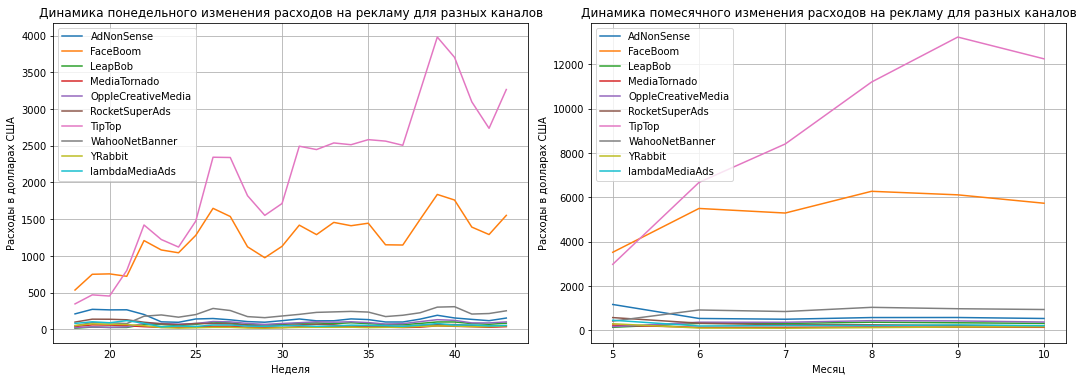

In [169]:
#  визуализируем динамику изменения расходов на рекламу для каждого канала по неделям и месяцам

plt.figure(figsize=(15, 10))

ax1 = plt.subplot(2, 2, 1)
weekly_channel_costs.T.plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('Неделя')
plt.ylabel('Расходы в долларах США')
plt.title('Динамика понедельного изменения расходов на рекламу для разных каналов')

ax2 = plt.subplot(2, 2, 2)
monthly_channel_costs.T.plot(grid=True, ax=ax2)
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Расходы в долларах США')
plt.title('Динамика помесячного изменения расходов на рекламу для разных каналов')

plt.tight_layout()
plt.show()

По данным графикам отлично видно, что за рассматриваемый период большая часть рекламного бюджета была распределена между двумя каналами: TipTop и FaceBoom. Причем средства, вложенные в продвижение через рекламный канал TipTop заметно росли с течением времени и увеличились почти в 4 раза к сентябрю: бюджет за май составлял около 3 тысяч долларов, в то время как бюджет сентября составил около 13 тысяч долларов. Расходы на привлечение новых пользователей через канал FaceBoom также увеличились, но не так заметно: к концу исследуемого периода месячные расходы выросли на 2 тысячи долларов. 


Взглянем отдельно на динамику изменения расходов на каналы продвижения, на которые выделяются меньшие бюджеты, так как на вышеприведенном графике их плохо видно.

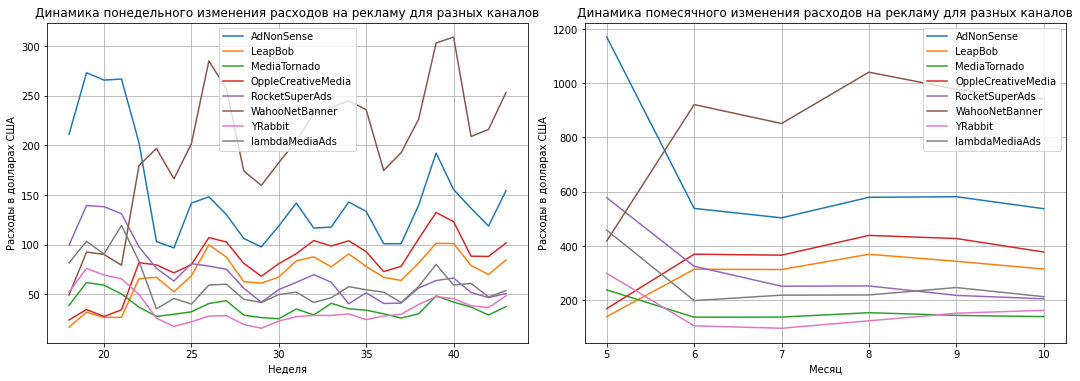

In [170]:
# визуализируем понедельные и помесячные изменения расходов на рекламу для каналов с меньшими бюджетами 

plt.figure(figsize=(15, 10))

ax1 = plt.subplot(2, 2, 1)
weekly_channel_costs.query('channel != "TipTop" and channel != "FaceBoom"').T.plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('Неделя')
plt.ylabel('Расходы в долларах США')
plt.title('Динамика понедельного изменения расходов на рекламу для разных каналов')

ax2 = plt.subplot(2, 2, 2)
monthly_channel_costs.query('channel != "TipTop" and channel != "FaceBoom"').T.plot(grid=True, ax=ax2)
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Расходы в долларах США')
plt.title('Динамика помесячного изменения расходов на рекламу для разных каналов')

plt.tight_layout()
plt.show()

На этих графиках лучше видна динамика изменений расходов на рекламу в каналах, на которые расходуются меньшие бюджеты. Видно, что расходы на рекламу в нескольких каналах увеличивали, речь идет о WahooNetBanner, OppleCreativeMedia и LeapBob. Для других каналов бюджеты сокращались с июня. 

На этапе исследовательского анализа данных были выявлены каналы, которые показывают самый хороший процент платящих пользователей: FaceBoom, LambdaMediaAds и AdNonSense. Необходимо отметить, что расходы на продвижение через LambdaMediaAds и AdNonSense значительно меньше чем на FaceBoom и TipTop.

### Средняя стоимость привлечения пользователей из разных источников
<a id='header_19'></a>

In [171]:
# рассчитаем сколько в среднем стоило привлечение одного пользователя для каждого источника (САС)

channel_cac = profiles.query('channel != "organic"').groupby('channel').agg({'acquisition_cost':'mean'})
channel_cac['acquisition_cost'] = channel_cac['acquisition_cost'].round(2)
channel_cac = channel_cac.sort_values(by='acquisition_cost',ascending=False).reset_index()
channel_cac.columns = ['Канал привлечения', 'Стоимость привлечения (САС)']
channel_cac

Канал привлечения  Стоимость привлечения (САС)
0              TipTop                         2.80
1            FaceBoom                         1.11
2          AdNonSense                         1.01
3      lambdaMediaAds                         0.72
4      WahooNetBanner                         0.60
5      RocketSuperAds                         0.41
6  OppleCreativeMedia                         0.25
7        MediaTornado                         0.22
8             YRabbit                         0.22
9             LeapBob                         0.21

Самая высокая стоимость привлечения у пользователей, которые пришли в приложение из TipTop, привлечение 1 пользователя через этот канал в среднем обходится в 2,8 доллара, что как минимум в два с половиной раза превышает стоимость привлечения через любой другой канал. 


Самая низкая средняя стоимость привлечения у каналов:
- OppleCreativeMedia - 0,25$
- MediaTornado - 0,22$
- YRabbit - 0,22$
- Leapbob - 0,21$


**Промежуточные выводы по анализу рекламы**

**Распределение рекламного бюджета**

На два канала продвижения уходит 83% всего рекламного бюджета: на TipTop - 52%, на FaceBoom - 31%. Всего на рекламу в разных каналах за рассматриваемый период было потрачено 105 497 долларов. В остальные каналы привлечения приложение вкладывало значительно меньшие суммы, их бюджеты распределены от 944 до 5151 долларов, а их общая доля бюджета составляет 17%.

**Динамика расходов на рекламу**

Средства, вложенные в продвижение через рекламный канал TipTop заметно росли с течением времени: бюджет за май составлял около 3 тысяч долларов, в то время как бюджет сентября составил около 13 тысяч долларов. Рост в 4 раза. 

Расходы на привлечение новых пользователей через канал FaceBoom также увеличились, но не так заметно: в начале исследуемого периода расходы составляли около 3800 долларов, а к его концу месячные расходы выросли на 2 тысячи долларов. 

На остальные каналы тратится меньше средств: в целом, расходы на большую часть каналов привлечения не превышают месячный бюджет в 600 долларов. В каналах WahooNetBanner, OppleCreativeMedia и LeapBob траты на рекламу незначительно увеличивались, в то время как для других каналов начиная с июня бюджеты сокращались. 

**Стоимость привлечения пользователей**

Самая высокая стоимость привлечения у пользователей, которые пришли в приложение из TipTop, привлечение 1 пользователя через этот канал в среднем обходится в 2,8 доллара, что как минимум в два с половиной раза превышает стоимость привлечения через любой другой канал. 

Самая низкая средняя стоимость привлечения у каналов OppleCreativeMedia, MediaTornado, YRabbit и LeapBob, она составляет 0,25, 0,22, 0,22 и 0,21 соответственно. 


## Анализ окупаемости рекламы
<a id='header_20'></a>

### Момент и горизонт анализа данных
<a id='header_21'></a>

**Поскольку в бизнес-плане заложено, что пользователи должны окупаться не позднее, чем через 2 недели, будем использовать именно такой горизонт анализа. Так как целью исследования является анализ эффективностии рекламы, мы исключим органических пользователей**

In [172]:
# задаем момент и горизонт анализа данных

observation_date = datetime(2019, 11, 1).date()

horizon_days = 14

### Окупаемость рекламы в целом
<a id='header_22'></a>

In [173]:
# исключаем органических пользователей

paid_users = profiles.query('channel != "organic"')

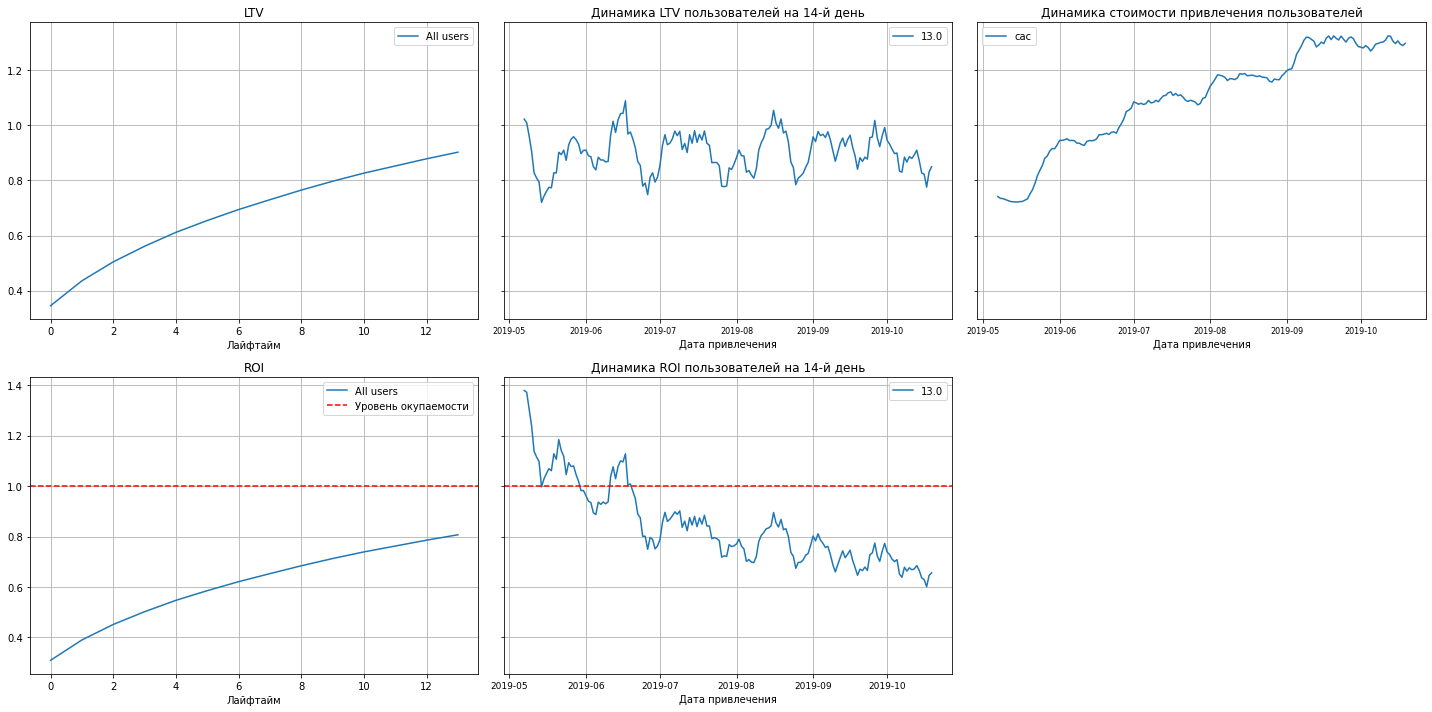

In [174]:
# # считаем LTV, ROI и их динамику, а затем визуализируем это


ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_users, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**ROI**

Реклама не окупается: ROI 14-ого дня едва доходит до 80%. Реклама перестала окупаться в июне, хотя падение окупаемости началось еще в мае, а во второй половине октября опустился до 60%.

**LTV**

LTV 14 дня достаточно стабилен, к концу второй недели он в среднем достигает 0,9 долларов.

**CAC**

Стоимость привлечения пользователей значительно увеличивалась весь период: в первой половине мая стоимость привлечения одного пользователя состаляла около 0,75 доллара, а к концу периода достигла примерно 1,1 доллара. 


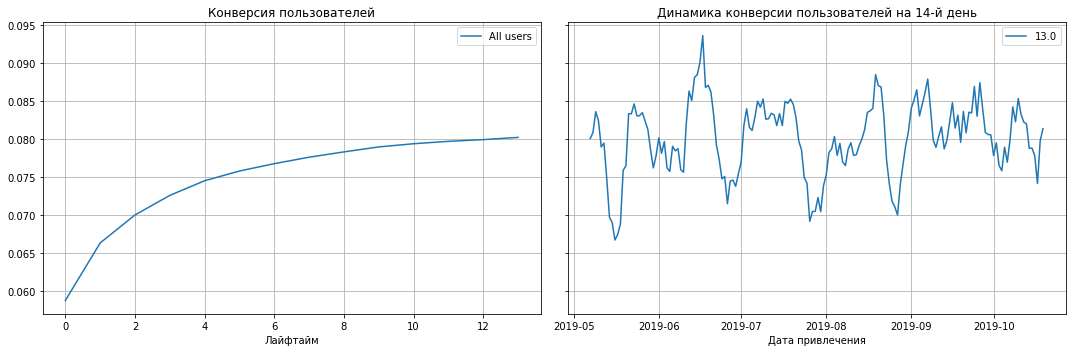

In [175]:
# построим график конверсии и ее динамики

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_users, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

По графику конверсии видно, что конверсия медленно растет, достигая к 14 дню 8%. 

Серьезных изменений в динамике конверсии не наблюдается, но можно увидеть, что перепады роста и падения стали менее значительными.

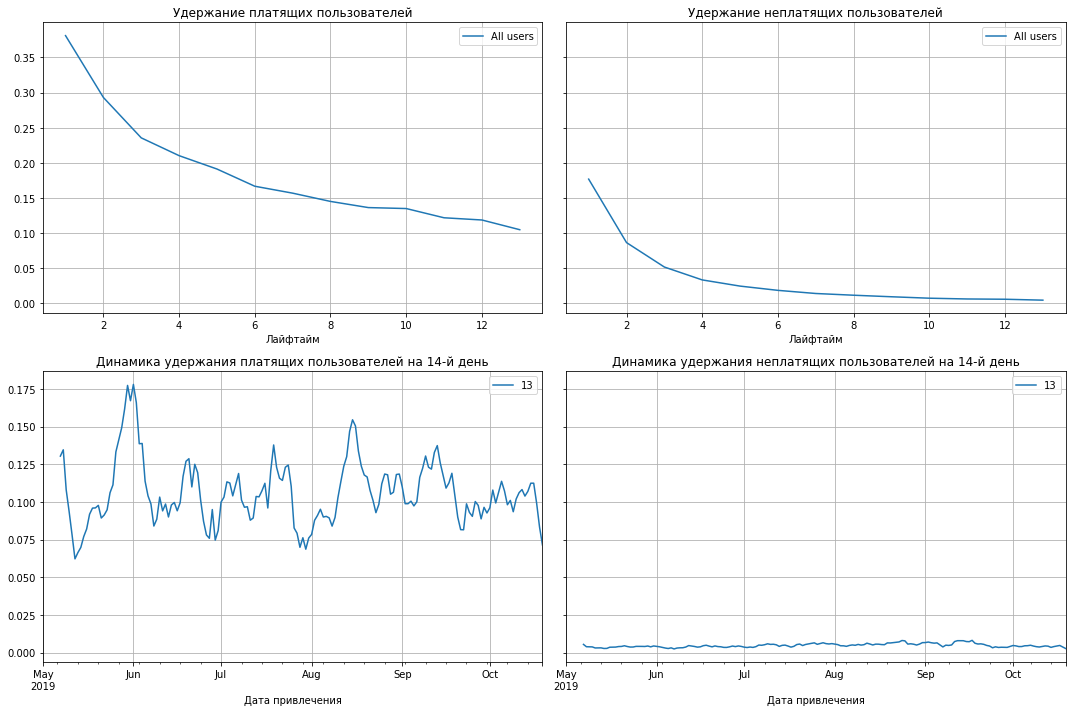

In [176]:
# построим графики удержания и динамики удержания

retention_raw, retention_grouped, retention_history = get_retention(
    paid_users, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Удержание**

В целом, график удержания имеет ожидаемый вид: из платящих на второй день в приложении остаются лишь 38% пользователей, а к концу второй недели продолжают использовать приложение около 11% человек из этой группы. 

Удержание неплатящих пользователей ожидаемо ниже: на второй день оно составляет около 17%, а к концу второй недели приближается к нулю.

**Динамика показателя**

Динамика удержания пользователей на конец двухнедельного периода относительно стабильна. Как и динамика конверсии, динамика удержания демонстрирует снизившиеся перепады роста и падения. Причины этого могут быть связаны с сезонностью.

### Окупаемость рекламы для разных устройств
<a id='header_23'></a>

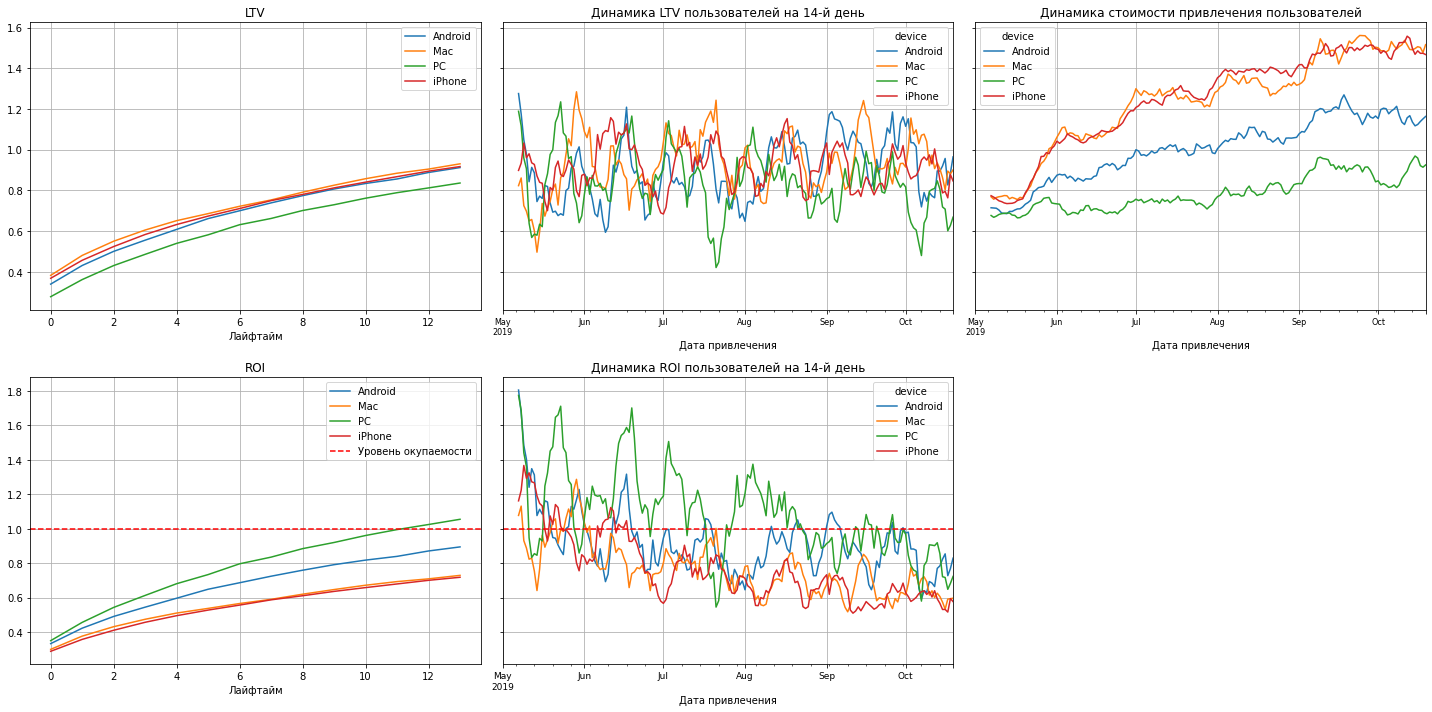

In [177]:
# посмотрим на LTV, ROI и их динамику с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**LTV и его динамика**

PC отстает от других устройств по пожизненной ценности 1 пользователя на 0,1 доллара, но в целом LTV для разных устройств отличается незначительно и к концу второй недели показывает одинаковый рост. Динамика LTV пользователей на 14-ый день стабильна.

**CAC**

Стоимость привлечения пользователей росла для всех устройств, начиная с мая 2019 года, наиболее высокий САС у Iphone и Mac, у PC - самый низкий.

**ROI и его динамика**

К концу второй недели реклама окупается только на 1 устройстве - PC.  Mac и Iphone показывают почти идентично плохие результаты: реклама на этих устройствах далеко до окупаемости даже на 14 день, ROI 14-ого дня составляет около 66%. ROI Android составляет около 90%. Окупаемость 14 дня по устройствам:
- PC - 105%
- Android - 90%
- Mac - 65%
- IPhone - 65%

Окупаемость рекламы с течением времени ухудшалась для всех устройств. На графике динамики ROI на 14 день хорошо видно, что реклама Mac не окупалась начиная с июня, а в середине этого месяца ROI Iphone также опустился ниже 100% и постепенно понижается. Окупаемость Android неоднократно опускалась ниже 100%, но периодически снова росла. К октябрю уже все устройства перестали окупаться. Стоимость привлечения пользователей росла, а их LTV почти не изменился, поэтому окупаемость тоже устремилась вниз. 

Вероятно, причины падения ROI связаны с большими расходами на некачественную рекламу, но все равно проверим, что происходит с конверсией и удержанием для разных устройств. 

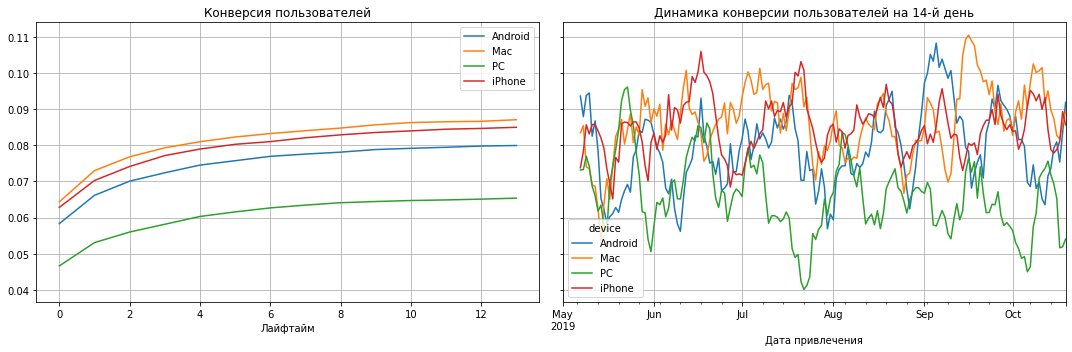

In [178]:
# построим графики конверсии и динамики конверсии с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

PC заметно отстает от других устройств по конверсии, к 14 дню только 6,5%. Самые хорошие показатели конверсии у пользователей, использующих Mac - 8,7%, следом идет с небольшим отставанием Iphone - 8,5%, Android - 8%. 

За исследуемый период показатель не изменился существенным образом.

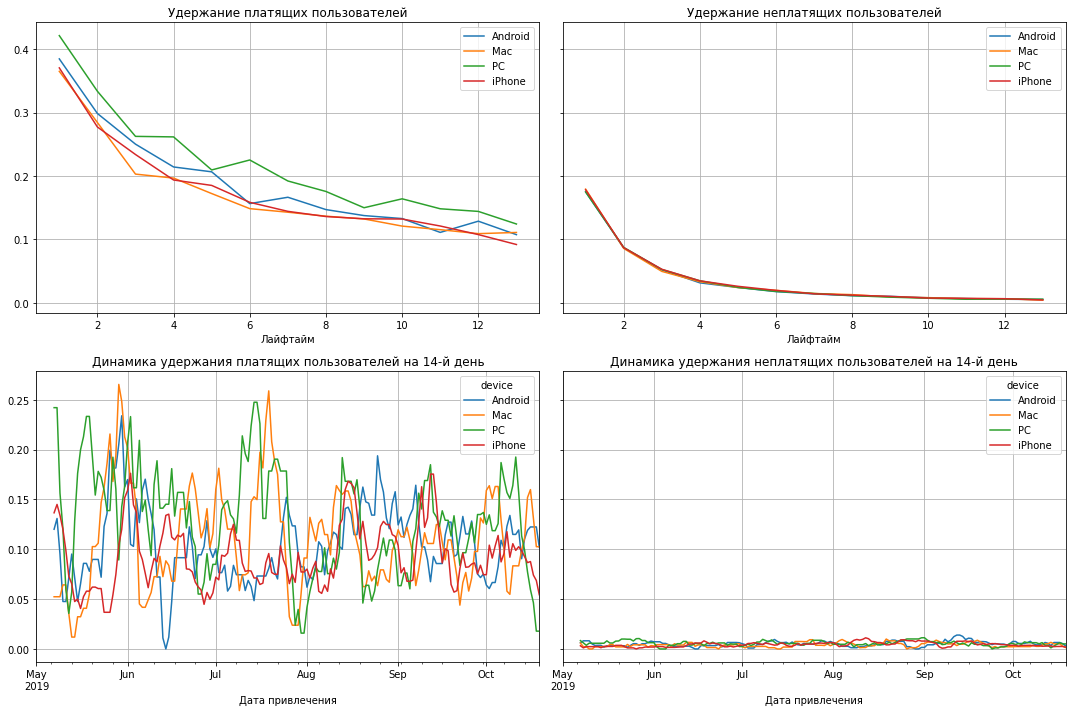

In [179]:
#  построим графики удержания и динамики удержания с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    paid_users, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание для разных устройств отличается не сильно, пользователи PC удерживаются немного лучше остальных.

При этом на графике динамики удержания 14-ого дня, видно, что показатели PC  и Mac немного снизились за изучаемый период, в то время как остальные устройства показывают стабильный результат.


### Окупаемость рекламы в разных странах
<a id='header_24'></a>

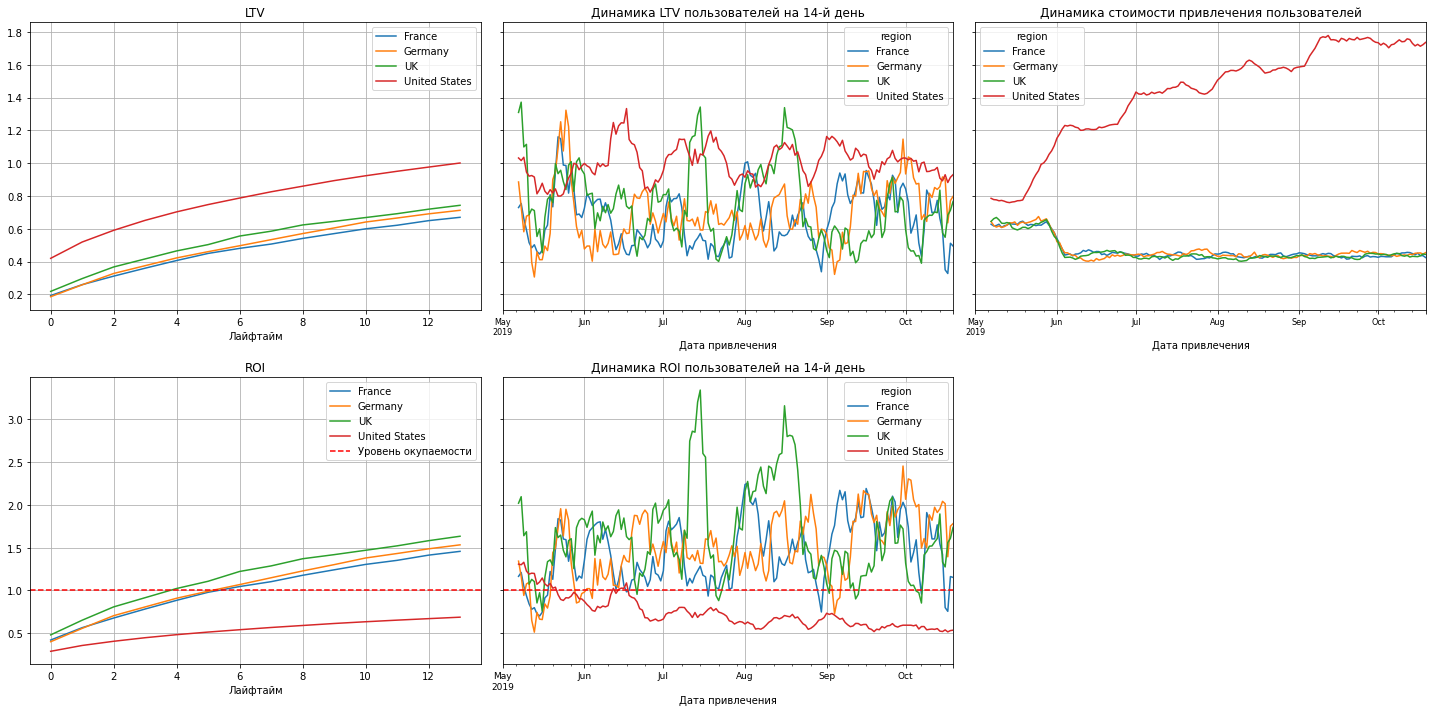

In [180]:
# посмотрим на графики LTV, ROI и их динамику с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**ROI**

В целом, можно сказать, что из всех стран не окупаются только США, при том, что LTV у США самый высокий. США не добираются до окупаемости даже к концу второй недели.Если посмотреть на график динамики ROI 14-ого дня можно увидеть, что примерно с середины мая окупаемость США ниже 100%, а ко второй половине октября падает почти до 50%.

Остальные страны показывают более стабильную картину: Франция, Германия и Великобритания к 7 дню уже достигают 100% окупаемости. 

**CAC**

На графике динамики стоимости привлечения видна колоссальная разница: стоимость привлечения пользователей в США за май подскочила более чем в два раза. И расходы на рекламное привлечение пользователей из США значительно превышают аналогичные расходы для пользователей остальных стран. 

При этом траты на привлечение стабильны и почти одинаковы для всех остальных стран: Германии, Великобритании и Франции. 

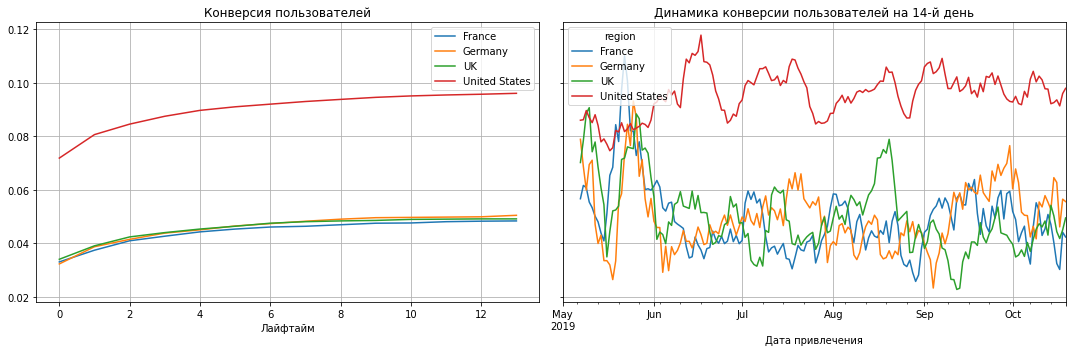

In [181]:
# построим графики конверсии и динамики конверсии с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия заметно выше у пользователей из СШA - 10%, при этом для США показатель конверсии на конец второй недели немного вырос за изучаемый период. 

Конверсия остальных стран к 14 дню достигает только 5%. За представленный период показатель несколько упал у пользователей не из США.

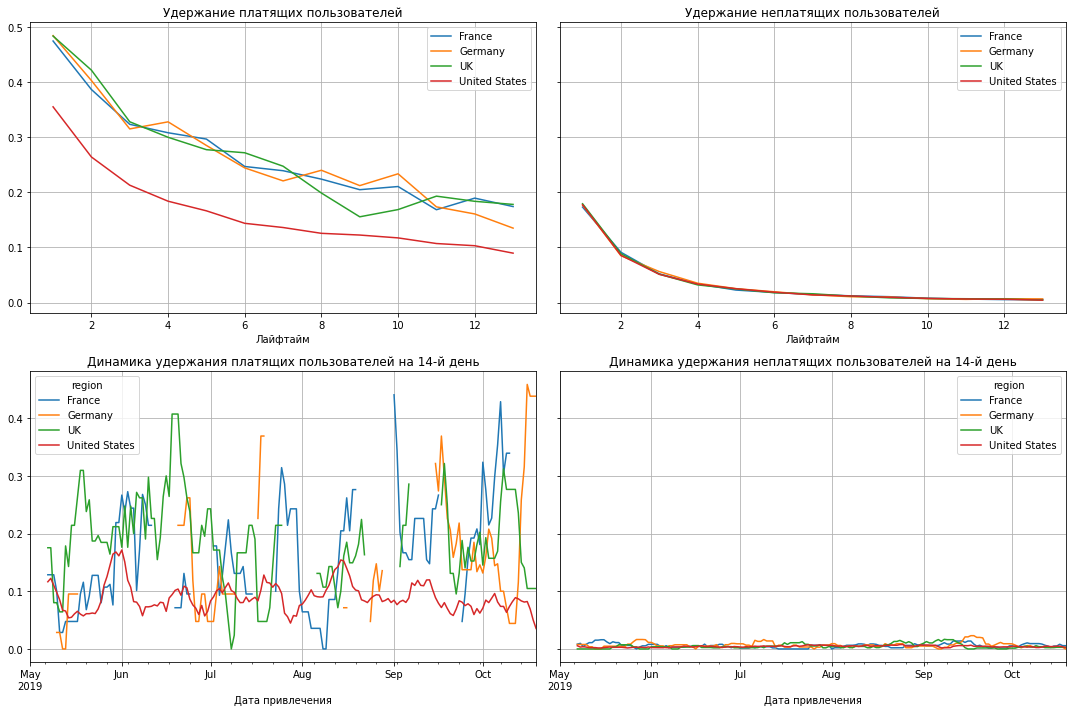

In [182]:
#  построим графики удержания и динамики удержания с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    paid_users, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

В отличии от показателей конверсии, показатели удержания пользователей из США стабильно отличаются от других стран в худшую сторону. К концу второй недели удержание падает до 10%. Для сравнения во Франции и Великобритании показатель падает до 18%.

Предположительно, реклама в США перестала окупаться, потому что стоимость привлечения пользователей сильно выросла, а незначительный рост конверсии и низкое удержание не смогли это компенсировать. Далее необходимо разобраться, как дела обстоят с разными рекламными каналами.

### Окупаемость рекламы в разных каналах привлечениях
<a id='header_25'></a>

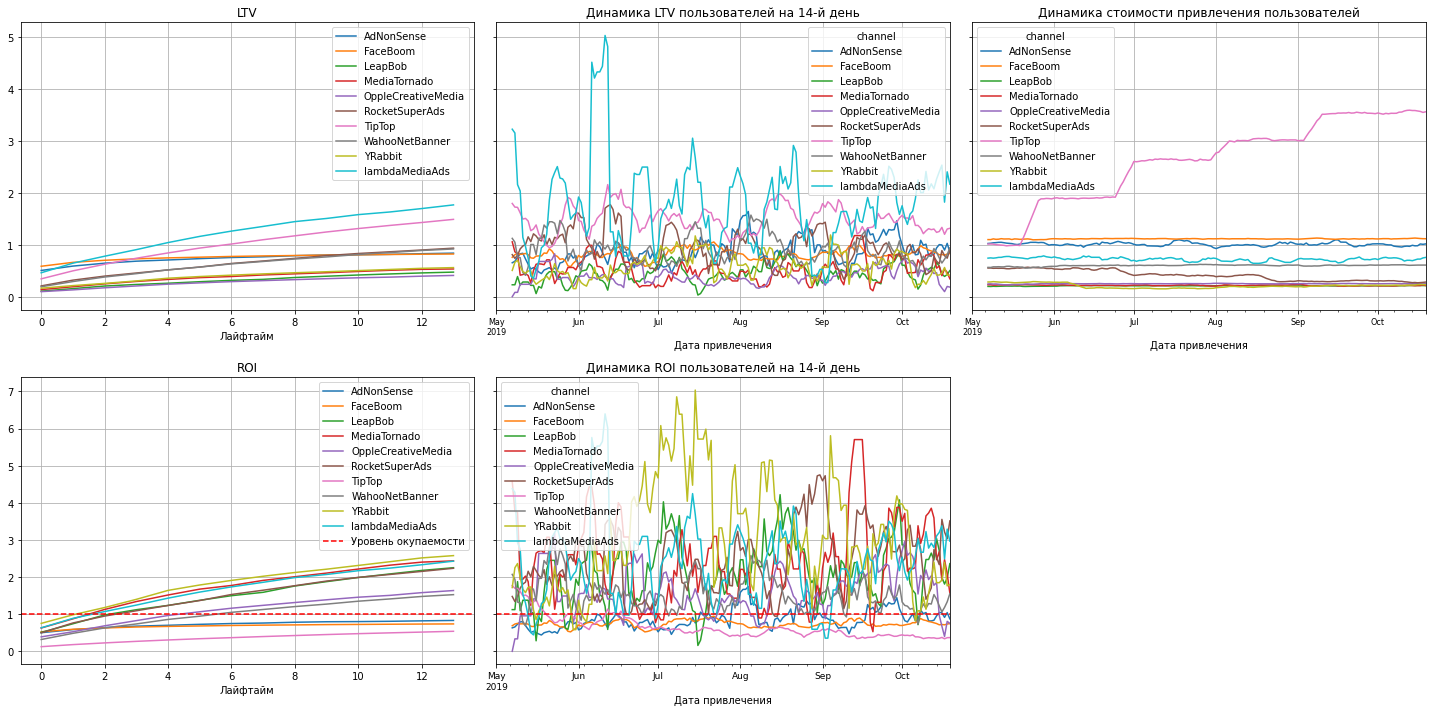

In [183]:
# посмотртим на графики LTV, ROI и их динамику с разбивкой по каналам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**ROI**

Реклама в целом окупается на большинстве каналов, за исключением:
- TipTop
- FaceBoom 
- AdNonSensе

Лучше всего окупается реклама:
- YRabbit
- LambdaMediaAds 
- RocketTornado 

**LTV**

LTV стабилен, но на графике динамики LTV 14-ого дня можно заметить лидера - LambdaMediaAds, показатели этого канала выделяются своими пиковыми значениями, поэтому, в целом за весь период, LTV пользователей, пришедших из этого канала, выше. LTV пользователей, которые пришли в приложение через TipTop тоже стабильно обгоняет другие каналы, однако, судя по всему, нивелируется высокой стоимостью привлечения пользователей.

**САС**
Расходы на рекламу стабильны для всех каналов привлечения за исключением одного -  TipTop. Рекламные траты на этот канал растут на протяжении всего периода.


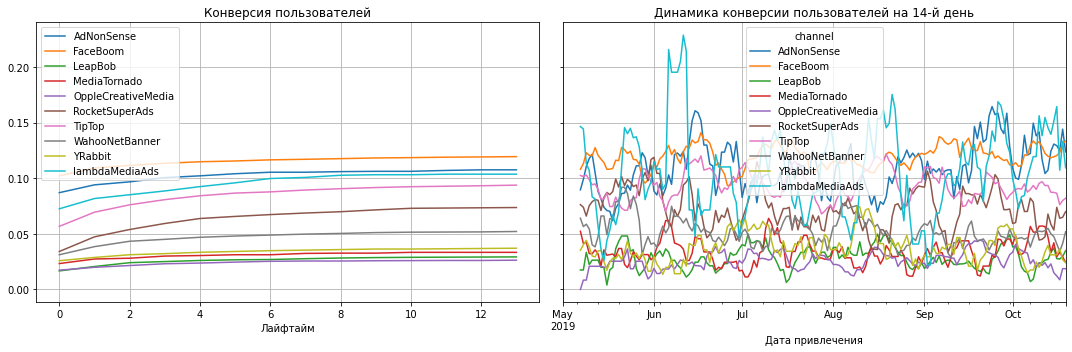

In [184]:
# построим графики конверсии и динамики конверсии с разбивкой по каналу привлечения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Лучшие показатели конверсии демонстрируют каналы FaceBoom, AdNonSense, LambdaMediaAds и TipTop. Динамика показателя стабильна.

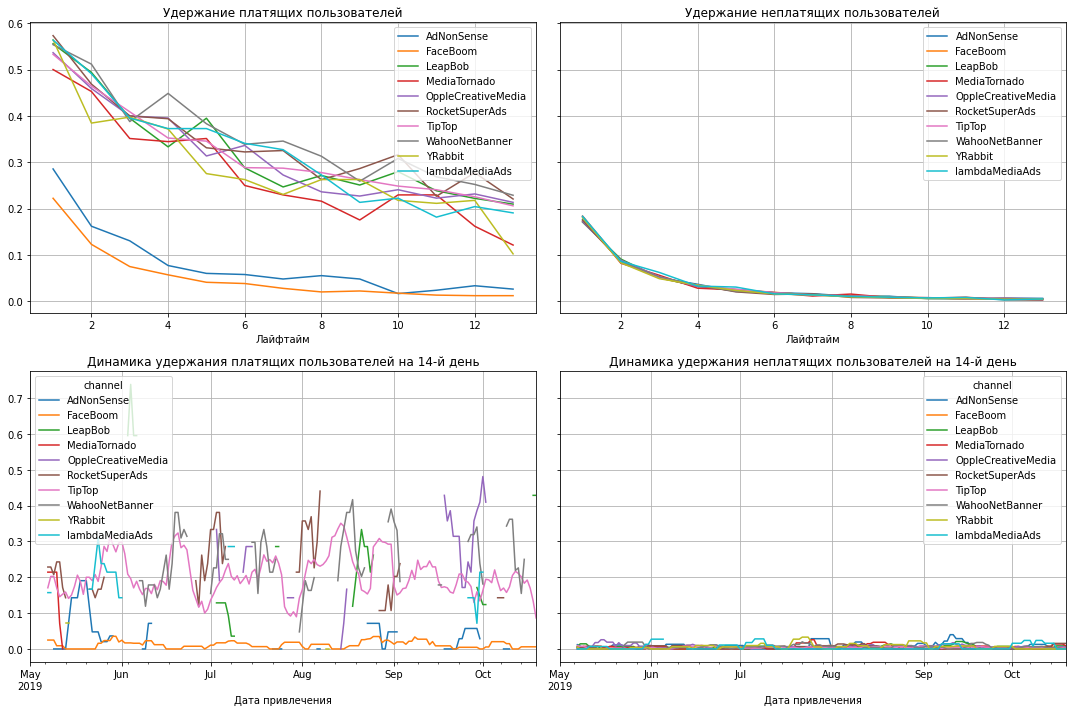

In [185]:
# посмотрим на график удержания и его динамики для разных каналов привлечения пользователей

retention_raw, retention_grouped, retention_history = get_retention(
    paid_users, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание FaceBoom и AdNonSense ниже чем у других каналов привлечения, к концу второй недели их удержание ниже примерно на 10% и падает до 2% и 4% соответственно.

Поскольку, из всех стран не окупается реклама исключительно в США, проверим, какие каналы привлечения пользователей задействованы в этой стране. Предположительно, это каналы, которые показывают самые плохие результаты окупаемости.


In [186]:
# посмотрим пользователей из каких стран привлекают TipTop, FaceBoom и AdNonSense

bad_channels = ['FaceBoom', 'TipTop', 'AdNonSense']
bad_channel_regions = profiles.query('channel in @bad_channels').groupby('channel').agg({'region':'value_counts'})
bad_channel_regions

region
channel    region               
AdNonSense France           1366
           UK               1295
           Germany          1219
FaceBoom   United States   29144
TipTop     United States   19561

Проверим, точно ли проблема в каналах привлечения, которые работают с США, а не в самом регионе. Необходимо удостовериться, что низкая окупаемость рекламы в США связана не с тем, что пользователям из США неинтересно приложение. Для этого посмотрим, есть ли еще какие-то рекламные каналы, которые привлекают пользователей из США, при том делают это успешно.

Для этого посмотрим на окупаемость и пожизненную ценность пользователей из США с разбивкой по каналам привлечения. 

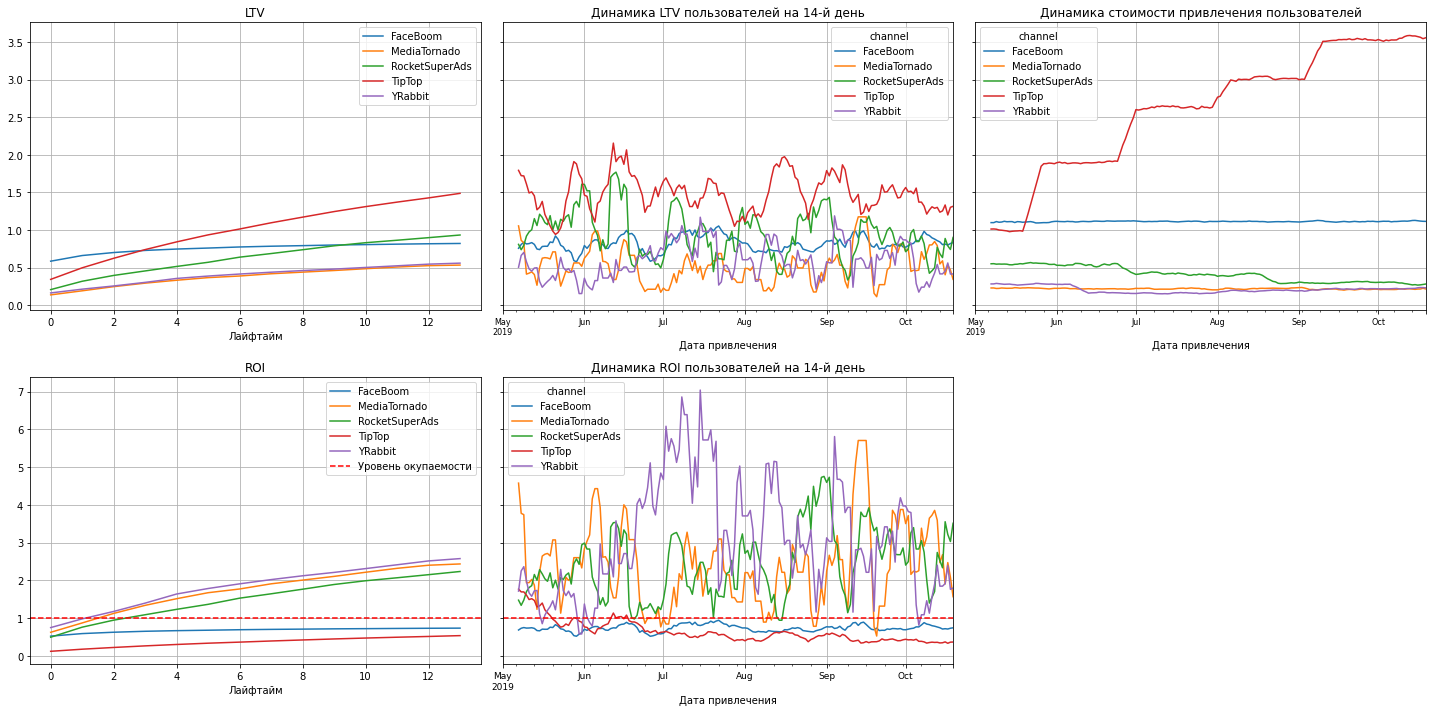

In [187]:
usa_users = paid_users.query('region == "United States"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    usa_users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Два из трех неокупающихся каналов работают исключительно на пользователей из США и, видимо, именно с этим связана неокупаемость рекламы в этом регионе. При этом FaceBoom и TipTop - это каналы, на которые тратятся самые большие рекламные бюджеты, их низкие показатели влияют на общую окупаемость. 

Пользователи из США приходят в приложение не только из двух вышеназванных каналов, но также из MediaTornado, RocketSuperAds, YRabbit, а также органически. ROI этих каналов за изучаемый период был стабильно выше 100%. Это позволяет сделать вывод, что некачественная реклама в двух крупных каналах негативно влияет на окупаемость рекламы в США. Поскольку пользователи из США составляют подавляющее большинство новых пользователей приложения, показатели окупаемости рекламы в целом снижаются.


Далее посмотрим подробнее, как дела обстоят со странами Европы. Для начала проверим, какие каналы работают только с Европой. 

In [188]:
# посмотрим на список каналов, работающих с Европой

europe = ['UK', 'Germany', 'France']
euro_channels = paid_users.query('region in @europe')['channel'].unique()
print('Каналы, привлекающие пользователей только из Европы:', *euro_channels)

Каналы, привлекающие пользователей только из Европы: AdNonSense LeapBob WahooNetBanner OppleCreativeMedia lambdaMediaAds


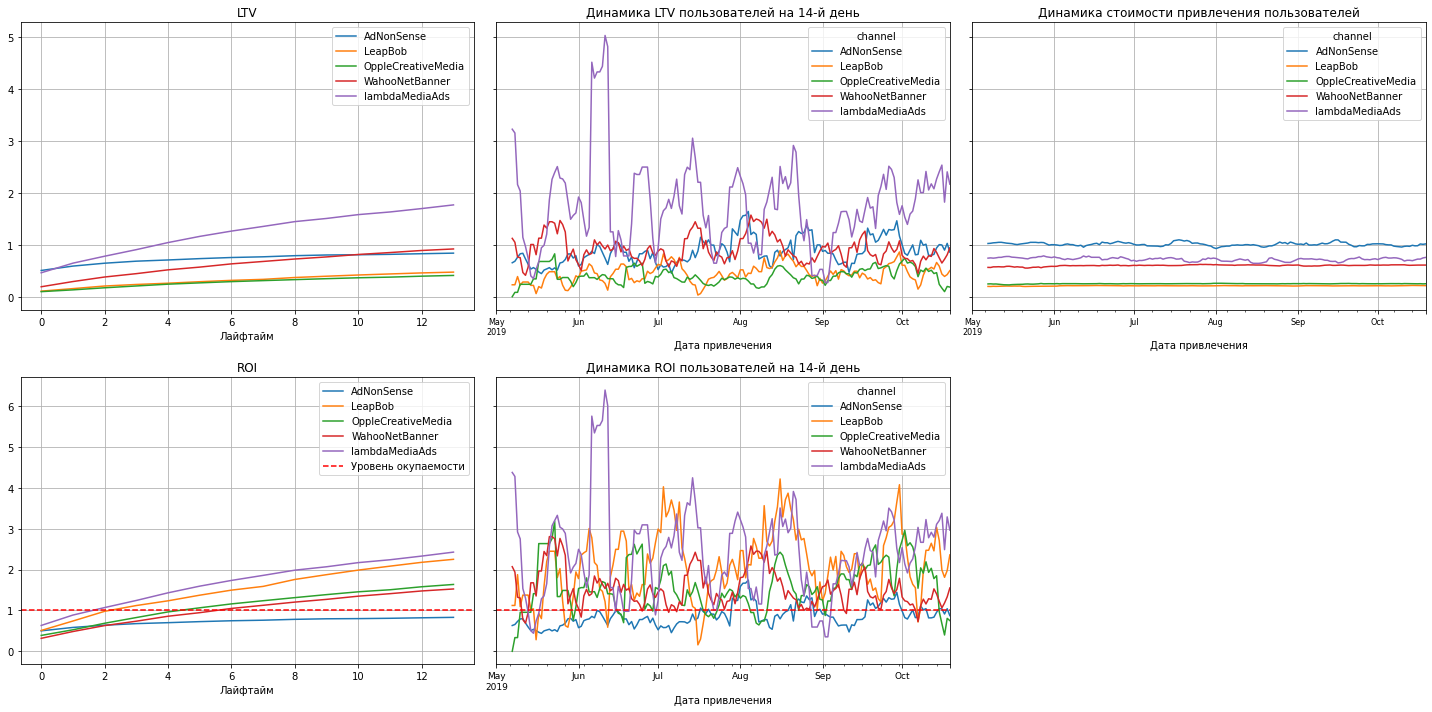

In [189]:
# строим графики LTV, ROI и их динамики

euro_users = paid_users.query('region != "United States"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    euro_users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Реклама ожидаемо не окупается только в канале AdNonSense. 

Остальные каналы демонстрируют стабильную окупаемость. Среди них положительно выделяются LambdaMediaAds и LeapBob, их ROI к концу второй недели превышает 200%.

Еще раз посмотрим на их конверсию и удержание.

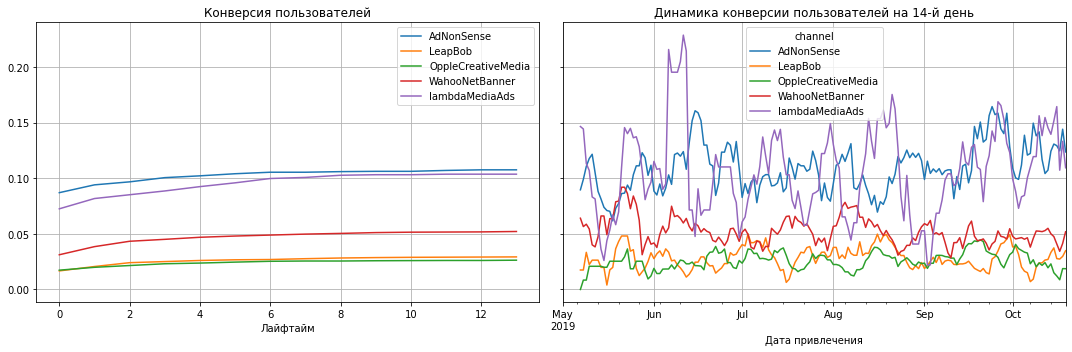

In [190]:
# строим графики конверсии и ее динамики только для каналов, работающих в Европе

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    euro_users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Помимо AdNonSense хорошую конверсию обеспечивает LambdaMediaAds, в динамике их лидерство сохраняется. В среднем, к 14-ому дню конверсия составляет 11%.

LeаpBob и OppleCreativeMedia показывают худшие результаты.

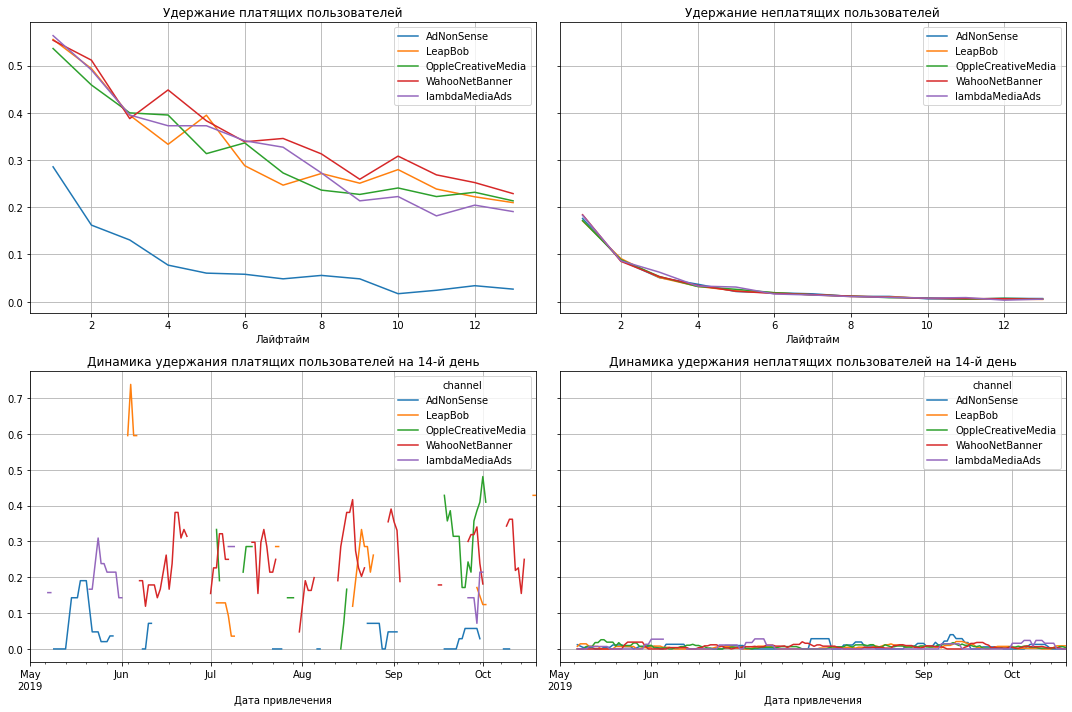

In [191]:
# строим графики удержания и его динамики для каналов, работающих в Европе

retention_raw, retention_grouped, retention_history = get_retention(
    euro_users, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 


В целом, пользователи из всех каналов, за исключением AdNonSense, удерживаются хорошо.

Проверим, работают ли эти каналы одновременно с разными странами Европы или сосредоточены на привлечении пользователей только конкретной страны.

In [192]:
# посмотрим, в каких странах Европы работают разные рекламные каналы

euro_channels_region = paid_users.query('channel in @euro_channels').groupby('channel').agg({'region':'value_counts'})
euro_channels_region

region
channel            region         
AdNonSense         France     1366
                   UK         1295
                   Germany    1219
LeapBob            UK         3046
                   France     2988
                   Germany    2519
OppleCreativeMedia UK         3052
                   France     2991
                   Germany    2562
WahooNetBanner     UK         3003
                   France     2971
                   Germany    2579
lambdaMediaAds     UK          758
                   France      742
                   Germany     649

Каналы работают не только на 1 страну, а на все сразу. 

Проверим, что страны Европы можно рассматривать как "единый" регион. Есть вероятность, что один и тот же канал может показывать разные результаты в разных странах, к примеру, окупаться в Великобритании, но не окупаться в Германии. В таком случае рекомендации по привлечению пользователей стран региона будут разными.

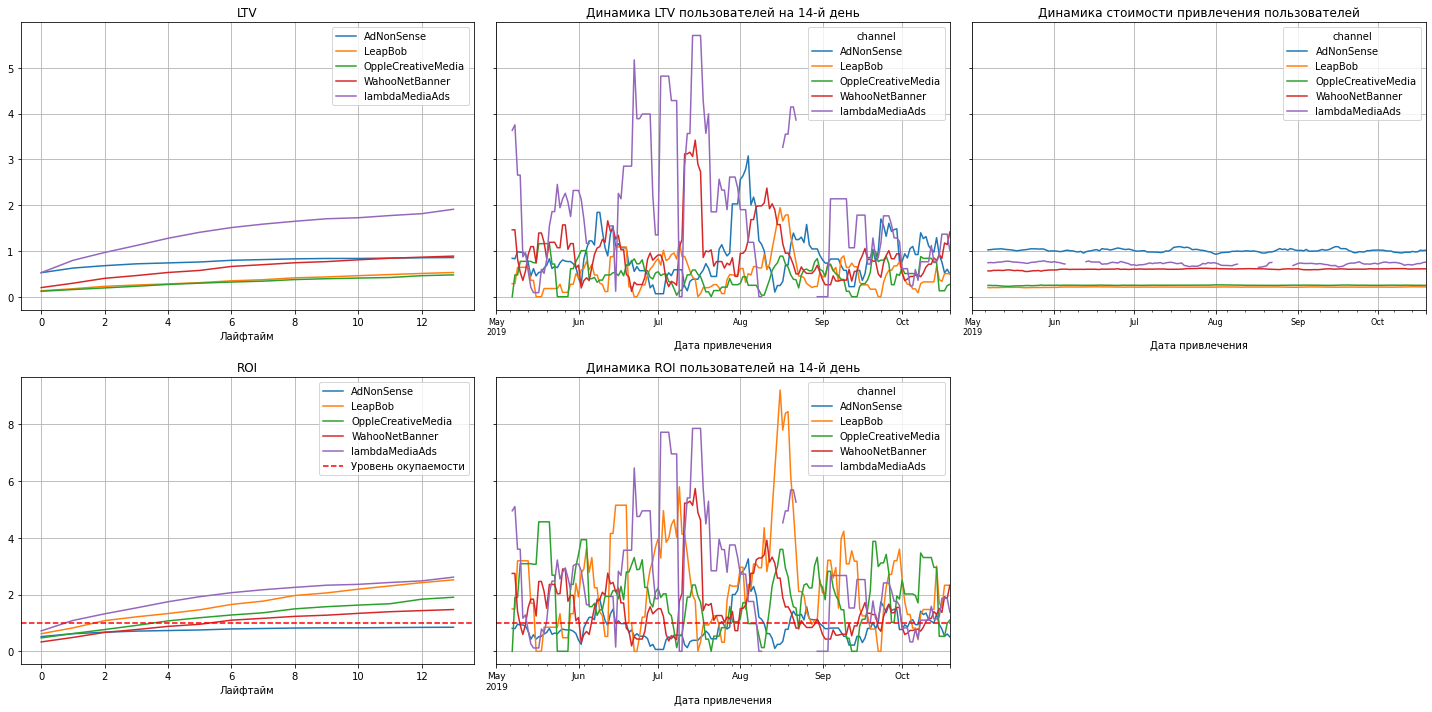

In [193]:
# проверяем как показывают себя разные рекламные каналы в Великобритании. Посмотрим на графики LTV и ROI

british_users = paid_users.query('region == "UK"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    british_users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

AdNonSensе не окупается. 

Стоит отметить, что ROI LambdaMediaAds со временем начал снижаться. График динамики изменения ROI показывает, что окупаемость каждого канала периодически опускалась ниже 100%, но LambdaMediaAds и LeapBob показывают лучшие результаты.

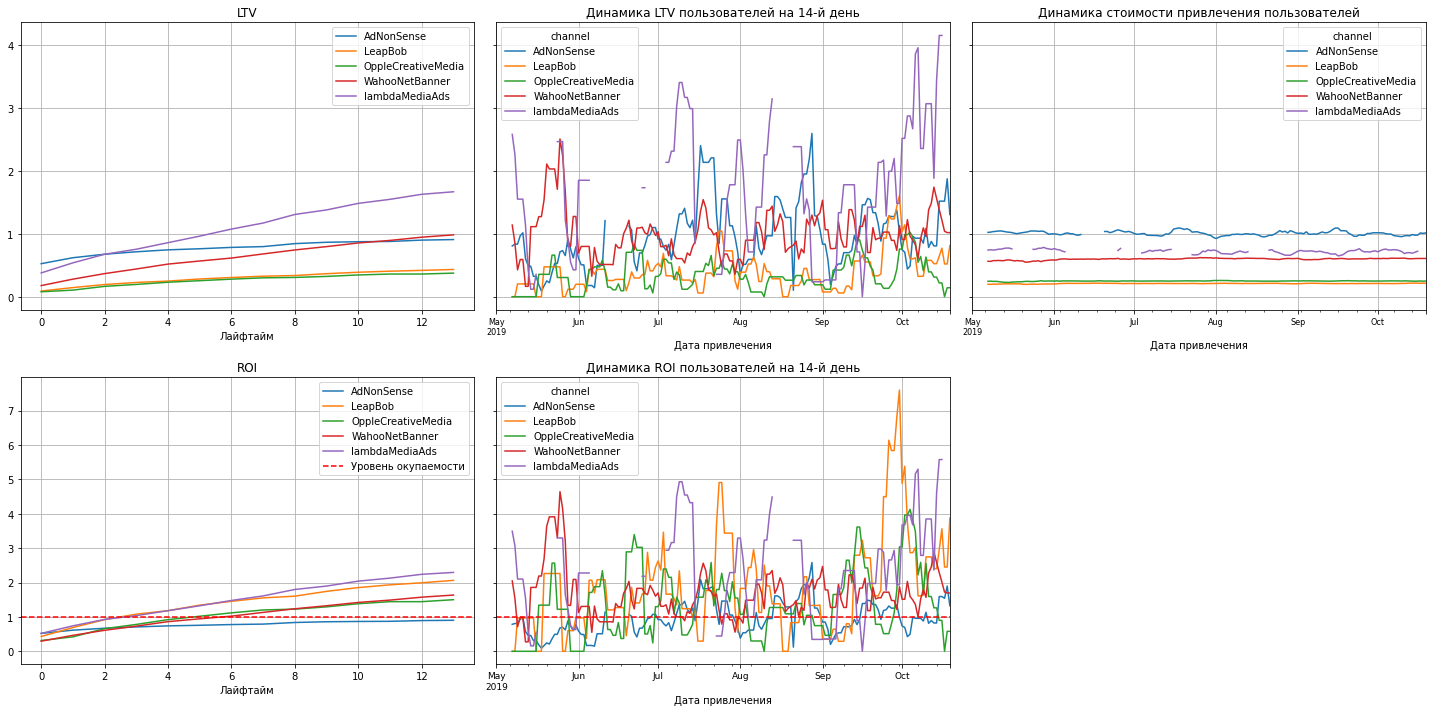

In [194]:
# строим графики LTV и ROI для рекламных каналов, которые привлекают пользователей из Германии

german_users = paid_users.query('region == "Germany"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    german_users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

В Германии похожая ситуация: AdNonSense не окупается, а LambdaMediaAds и LeapBob - молодцы, в концу 14 дня окупаемость превышает 200%.

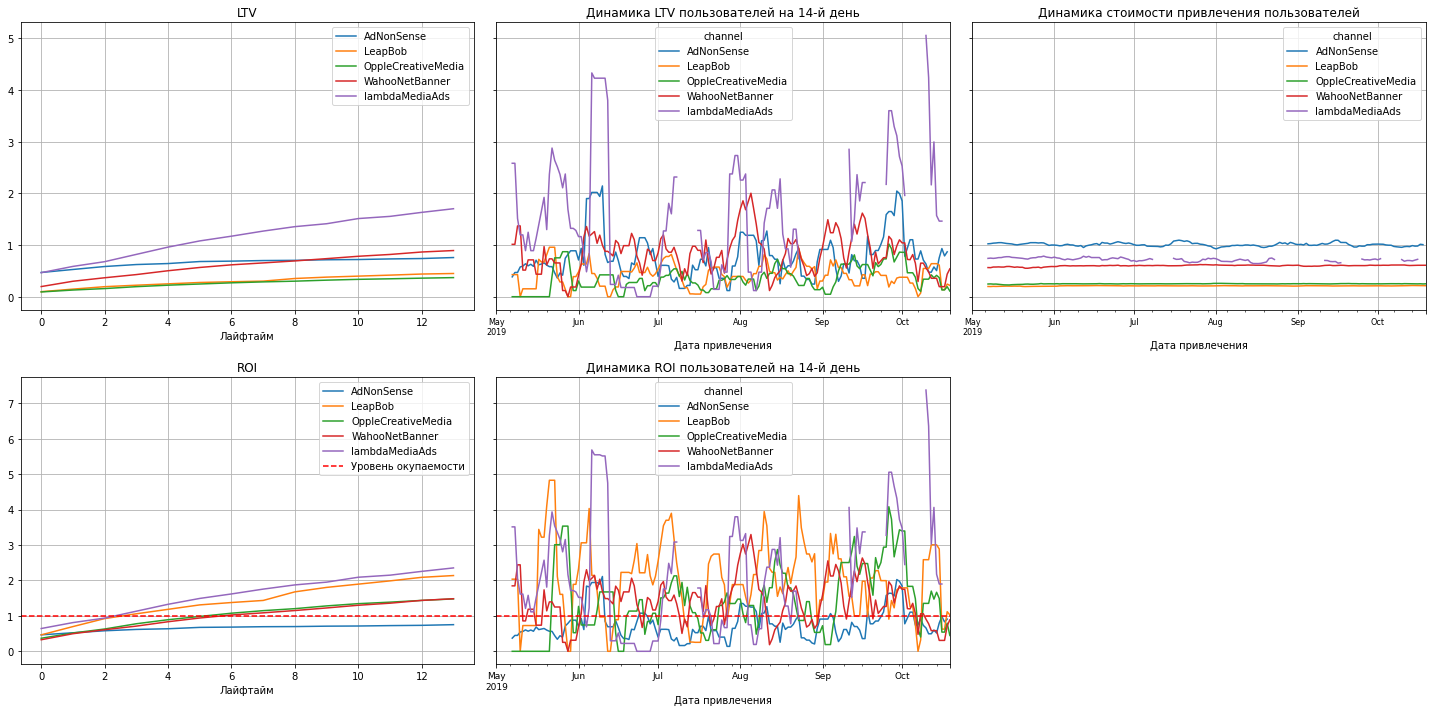

In [195]:
# строим графики LTV и ROI для каналов во Франции

french_users = paid_users.query('region == "France"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    french_users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Здесь все так же: AdNonSense в аутсайдерах окупаемости и не достигает 100% к 14-ому дню, а LambdaMediaAds и LeapBob окупаются как минимум на 200%.

# Выводы по анализу окупаемости рекламы
<a id='header_26'></a>

**Ситуация в целом**

Если рассматривать весь изучаемый период в целом, то можно уверенно сказать, что реклама не окупается: к концу второй недели использования приложения ROI  едва доходит до 80%. Однако ROI падал начиная с мая и опустился ниже уровня окупаемости примерно в середине июня, продолжил падение и во второй половине октября опустился до 60%.

LTV 14 дня достаточно стабилен, к концу второй недели он в среднем достигает 0,9 долларов.

Стоимость привлечения пользователей значительно увеличивалась весь период: в первой половине мая стоимость привлечения одного пользователя состаляла около 0,75 доллара, а к концу периода достигла примерно 1,1 доллара. 

**Когортный анализ**

После проведения когортного анализа и изучения окупаемости релкламы для разных когорт, стало ясно, какие устройства, страны и рекламные каналы оказывают негативное влияние на окупаемость рекламы в целом:

- Среди устройств не окупаются все, кроме PC, но хуже всего дела обстоят у Mac и iPhone. При этом показатели окупаемости снижались на протяжении всего рассматриваемого периода
- Среди стран не окупаются только США: начиная с мая ROI США падал, в середине мая опустился ниже порога окупемости, продолжил снижаться и упал до 50% ко второй половине октября
- Среди каналов привлечения не окупаются только TipTop, FaceBoom и AdNonSense. TipTop перестал окупаться в начале лета 2019 года, а два другизх канала не окупались на протяжении всего периода


Изучив графики LTV, ROI, их динамики, а также графики конверсии и удержания для разных когорт пользователей удалось выявить причины проблем с окупаемостью рекламы. Снижение ROI связано с ростом рекламных расходов в некачественных каналах. Речь идет о TipTop, FaceBoom и AdNonSense, однако первые два наносят более существеный вред, так как их доля в общем количестве новых платных пользователей огромна, их низкие показатели окупаемости тянут на дно окупаемость рекламы в целом. 

За рассматриваемый период приложение увеличило свои рекламные расходы на 2 канала привлечения - на рекламу в TipTop помесячные траты увеличились почти в 4 раза, а на рекламу в FaceBoom в 1,5 раза. Эти каналы привлекают пользователей только из США, что сказывается на низкой окупаемости всего региона. При этом судя по графику динамики САС стоимость привлечения 1 пользователя через TipTop сильно выросла, потому что количество новых пользователей не увеличивалось пропорционально вложениям, что привело к увеличению CAC. Неплохие показатели конверсии и удержания канала не смогли компенсировать такую высокую стоимость привлечения. В среднем, САС TipTop как минимум в два с половиной раза превышает САС других каналов. В данном случае причина неокупаемости кроется в некачественной рекламе в этом канале: несмотря на то, что пользователи из этого канала хорошо конвертируются в платящих и относительно хорошо удерживаются, само количество новых пользователей недостаточно. Вероятно, аудитория канала недостаточно соотносится с ЦА приложения, поэтому увеличение бюджетов на рекламу не приводит к увеличению новых пользователей. 

Второй канал, реламные траты на который росли - FaceBoom. С ним ситуация обстоит иначе: САС не увеличился, что говорит о том, что количество новых пользоваталей выросло вместе с увеличением рекламного бюджета, при этом у него самая хорошая конверсия, однако худшие показатели удержания. Пользователи, которые привлекаются через FaceBoom некачественные - они плохо удерживаются, это сказывается на их LTV, а в конечном счете и на ROI. 

Такая же ситуация с каналом AdNonSense: его САС не менялся на протяжении времени, он показывают одну из лучших конверсий - около 11%, но не может подкрепить это удержанием пользователей. Его удержание к концу второй недели около 4%, что почти на 16% отстает от результатов других каналов. 

**Рекомендации**

В целом, можно сказать, что среди пользователей приложения выделяются пользователи из 2 регионов - США и Европы. С США работает одна группа каналов привлечения, с Европой - другая, они не пересекаются, поэтому рекомендации будем давать исходя из этой детали. Показатели окупаемости, конверсии и удержания каналов привлечения отдельно в Германии, Великобритании и Франции, примерно одинаковы, что позволяет рассматривать эти страны как один регион. 
От некачественных рекламных каналов TipTop, FaceBoom  и AdNonSense стоит отказаться и перенаправить рекламные бюджеты на каналы, которые показывали самые хорошие общие результаты окупаемости, конверсии и удержания: 

* Для США рекомендуется сделать ставку на RocketSuperAds

*ROI 14-ого дня RocketSuperAds - примерно 220%*

RocketSuperAds обеспечивает неплохие конверсию и удержание - 7% и 23% соответственно. 

* Для Европы на LambdaMediaAds:

*ROI 14-ого дня LambdaMediaAds - примерно 240%*

LambdaMediaAds демонстрирует хорошие показатели конверсии - 10% к концу второй недели, неплохое удержание и самый высокий LTV, превышающий стоимость привлечения 1 пользователя.


В процессе исследования были выявлены каналы с более высоким ROI - YRabbit и MediaTornado, однако поскольку они не могут похвастать высокой конверсией, рекомендуется не делать на них ставку: к 14 дню конверсия достигает только 4%.


# Выводы по всем этапам исследования
<a id='header_27'></a>

  **Данный проект посвящен исследованию бизнес-показателей развлекательного приложения Procrastinate Pro+. Несмотря на большие вложения в рекламу, компания терпит убытки.**

Исследование будет проводится на основе данных о сессиях и покупках пользователей, которые присоединились к приложению в период с 1 мая по 27 октября 2019 года, а также рекламных расходах компании за данный период.

В нашем располряжении 3 датасета: с сессиями - visits, покупками - orders, и расходами на рекламу - costs.

Количество строк и столбцов с датасетах:

visits: 309901 строки и 6 столбцов,

orders: 40212 строк и 3 столбца,

costs: 1800 строк и 3 столбца.

Знакомство с данными позволило заметить проблемы, которые были решены на этапе предобработки данных.

**Предобработка данных**

Мы провели предобработку данных, в рамках которой были устранены следующие проблемы:

- некорректные названия столбцов приведены к змеиному регистру
- в столбцах, содержащих данные о дате и времени, изменен тип данных на тип datetime

Пропуски и дубликаты не были обнаружены.

**Для дальнейшей работы были созданы собственные функции для расчета интересующих нас метрик:**

- get_profiles() — для создания профилей пользователей,
- get_retention() — для подсчёта удержания и его динамики,
- get_conversion() — для подсчёта конверсии и его динамики,
- get_ltv() — для подсчёта LTV и ROI, а такде их динамики.

Таблицы удержания, конверсии и LTV+ROI позволяют посмотреть на значение метрик в разные лайфтаймы, разделяя пользователей на произвольные когорты. Таблицы динамики позволяют отследить изменения значений метрик в один и тот же лайфтайм, но для когорт, привлеченных в разные дни.

Также были созданы собственные функции для визуализации полученных таблиц:

- filter_data() — для сглаживания данных,
- plot_retention() — для построения графика удержания и его динамики,
- plot_conversion() — для построения графика конверсии и ее динамики,
- plot_ltv_roi — для визуализации LTV и ROI и их динамики.

**Исследовательсий анализ данных**

В результате проведенного исследовательского анализа данных удалось установить временные рамки, в которые к приложению присоединились новые пользователи - 1 мая и 27 октября 2019 года. 

За исследуемый период к приложению присоединись пользователи из США, Великобритании, Франции и Германии. Однозначно можно сказать, что большая часть пользователей пришли из США - 100002 пользователя. Остальные страны по количеству пользователей заметно отстают: 17575 пользователей из Великобритании, 17450 из Франции и 14981 пользователь из Германии. При этом пользователи из США активнее других становятся покупателями, доля платящих среди пользователей из этой страны составляет 7%. Этот же показатель для других стран ниже: 4% во Франции, 4% в Германии и чуть меньше 4% в Великобритании. Больше всего платящих пользователей приходит из США.


Среди пользователей приложения наибольшей популярностью пользуются iPhone, ими пользуются 54479 человек, на втором месте Android - 35032 пользователя. Близки по количеству пользователей Mac и PC: Mac - 30042 человек, PC -  30455 человек. Наиболее высокая доля пользователей, которые становятся платящими, среди тех, кто использует Mac и Iphone - 6,4% и 6,2% соответственно. На третьем месте Android с 5,9%. Среди пользователей, использующих PC 5% становятся платящими в приложении. Платящие пользователи предпочитают iPhone, доля пользователей Ihone среди всех плятщих пользователей- 38%.


За рассматриваемый период приложение приобрело органических и платных пользователей, при этом следует заметить, что органических пользователей больше, чем в других отдельно взятых рекламных каналах - 56439 человек. Однако платящие пользователи от этого числа занимают лишь 2%.
Топ-3 рекламных источника привлечения пользователей в приложение за рассматриваемый период: FaceBoom - 29144 пользователя, TipTop - 19561 пользователь, OppleCreativeMedia - 8605 пользователей. При этом наибольшая доля платящих пользователей среди пользователей, привлеченных через рекламный канал, у FaceBoom, AdNonSense и LambdaMediaAds, доли платящих в этих каналах: 12%, 11% и 11% соотвтественно. Больше всего платящих пользователей в приложение приводят  FaceBoom и TipTop, их доли в общем количестве платящих пользователей 40% и 21% соотвтественно. 


**Можно сделать вывод, что платящие пользователи по большей части приходят из США, пользуются iPhone и переходят в приложение из канала FaceBoom.**


**Анализ маркетинга**

Всего на рекламу в разных каналах за рассматриваемый период было потрачено 105497 долларов. 

- Распределение трат по рекламным источникам

Самыe высокиe бюджеты на рекламное продвижение приходятся на TipTop - 54751 долларов; и FaceBoom - 32446 долларов. В остальные каналы привлечения приложение вкладывало значительно меньшие суммы, их бюджеты распределены от 944 до 5151 долларов. 

- Динамика изменения расходов на рекламу во времени

Большая часть рекламного бюджета была распрелделена между двумя каналами: TipTop и FaceBoom. Причем средства, вложенные в продвижение через рекламный канал TipTop заметно росли с течением времени: бюджет за май составлял около 3 тысяч долларов, в то время как бюджет сентября составил около 13 тысяч долларов. Расходы на привлечение новых пользователей через канал FaceBoom также увеличились, но не так заметно: в начале исследуемого периода расходы составляли около 3800 долларов, а к его концу месячные расходы выросли на 2 тысячи долларов. 
На остальные каналы тратится меньше средств: в целом, расходы на большую часть каналов привлечения не превышают месячный бюджет в 600 долларов. В каналах WahooNetBanner, OppleCreativeMedia и LeapBob траты на рекламу незначительно увеличивались, в то время как для других каналов начиная с июня бюджеты сокращались. 

- Средняя стоимость привлечения пользователей из разных каналов

Самая высокая стоимость привлечения у пользователей, которые пришли в приложение из TipTop, привлечение 1 пользователя через этот канал в среднем обходится в 2,8 доллара, что как минимум в два с половиной раза превышает стоимость привлечения через любой другой канал. 
Стоимость привлечения через каналы, которые демонстрируют лучшую конверсию в платящих пользователей находится в диапазоне от 0,72 до 1,11 долларов: FaceBoom - 1,11$, AdNonSense - 1,01$, LambdaMediaAds - 0,72$.
Самая низкая средняя стоимость привлечения у каналов OppleCreativeMedia, MediaTornado, YRabbit и LeapBob, она составляет 0,25, 0,22, 0,22 и 0,21 соответственно. 

**Анализ окупаемости рекламы**

*Поскольку в бизнес-плане заложено, что пользователи должны окупаться не позднее, чем через 2 недели, будем использовать именно такой горизонт анализа. Поскольку мы проводили анализ эффективности рекламы, органические пользователи были исключены из исследования. Момент анализа данных 1 ноября 2019 года.*

*Для анализа окупаемости рекламы были построены графики LTV, ROI, графики динамики CAC, ROI и LTV. Для когортного анализа строились графики с разбивкой по определенным признакам - стране, устройству, каналу привлечения. Для того, чтобы лучше разобраться в ситуации были также построены графики конверсии, удержания и их динамики.*

**Если рассматривать весь изучаемый период в целом, то можно уверенно сказать, что реклама не окупается: к концу второй недели использования приложения ROI  едва доходит до 80%. Однако ROI падал начиная с мая и опустился ниже уровня окупаемости примерно в середине июня, продолжил падение и во второй половине октября опустился до 60%.**

**LTV 14 дня достаточно стабилен, к концу второй недели он в среднем достигает 0,9 долларов.**

**Стоимость привлечения пользователей значительно увеличивалась весь период: в первой половине мая стоимость привлечения одного пользователя состаляла около 0,75 доллара, а к концу периода достигла примерно 1,1 доллара.**

После проведения когортного анализа и изучения окупаемости релкламы для разных когорт, стало ясно, какие устройства, страны и рекламные каналы оказывают негативное влияние на окупаемость рекламы в целом:
- Среди устройств не окупаются все, кроме PC, но хуже всего дела обстоят у Mac и iPhone. При этом показатели окупаемости снижались на протяжении всего рассматриваемого периода
- Среди стран не окупаются только США: начиная с мая ROI США падал, в середине мая опустился ниже порога окупемости, продолжил снижаться и упал до 50% ко второй половине октября
- Среди каналов привлечения не окупаются только TipTop, FaceBoom и AdNonSense. TipTop перестал окупаться в начале лета 2019 года, а два другизх канала не окупались на протяжении всего периода

**Причины неэффективности привлечения пользователей**

Изучив графики LTV, ROI, их динамики, а также графики конверсии и удержания для разных когорт пользователей удалось выявить причины проблем с окупаемостью рекламы. Снижение ROI связано с ростом рекламных расходов в некачественных каналах. Речь идет о TipTop, FaceBoom и AdNonSense, однако первые два наносят более существеный вред, так как их доля в общем количестве новых платных пользователей огромна, их низкие показатели окупаемости тянут на дно окупаемость рекламы в целом. 

Изучив графики LTV, ROI, их динамики, а также графики конверсии и удержания для разных когорт пользователей удалось выявить причины проблем с окупаемостью рекламы. Снижение ROI связано с ростом рекламных расходов в некачественных каналах. Речь идет о TipTop, FaceBoom и AdNonSense, однако первые два наносят более существеный вред, так как их доля в общем количестве новых платных пользователей огромна, их низкие показатели окупаемости тянут на дно окупаемость рекламы в целом. 

**За рассматриваемый период приложение увеличило свои рекламные расходы на 2 канала привлечения - на рекламу в TipTop помесячные траты увеличились почти в 4 раза, а на рекламу в FaceBoom в 1,5 раза. Эти каналы привлекают пользователей только из США, что сказывается на низкой окупаемости всего региона. При этом судя по графику динамики САС стоимость привлечения 1 пользователя через TipTop сильно выросла, потому что количество новых пользователей не увеличивалось пропорционально вложениям, что привело к увеличению CAC. Неплохие показатели конверсии и удержания канала не смогли компенсировать такую высокую стоимость привлечения. В среднем, САС TipTop как минимум в два с половиной раза превышает САС других каналов. В данном случае причина неокупаемости кроется в некачественной рекламе в этом канале: несмотря на то, что пользователи из этого канала хорошо конвертируются в платящих и относительно хорошо удерживаются, само количество новых пользователей недостаточно. Вероятно, аудитория канала недостаточно соотносится с ЦА приложения, поэтому увеличение бюджетов на рекламу не приводит к увеличению новых пользователей.** 

**Второй канал, реламные траты на который росли - FaceBoom. С ним ситуация обстоит иначе: САС не увеличился, что говорит о том, что количество новых пользоваталей выросло вместе с увеличением рекламного бюджета, при этом у него самая хорошая конверсия, однако худшие показатели удержания. Пользователи, которые привлекаются через FaceBoom некачественные - они плохо удерживаются, это сказывается на их LTV, а в конечном счете и на ROI.**

**Такая же ситуация с каналом AdNonSense: его САС не менялся на протяжении времени, он показывают одну из лучших конверсий - около 11%, но не может подкрепить это удержанием пользователей. Его удержание к концу второй недели около 4%, что почти на 16% отстает от результатов других каналов.** 

*Рекомендации отделу маркетинга*

 **В целом, можно сказать, что среди пользователей приложения выделяются пользователи из 2 регионов - США и Европы. С США работает одна группа каналов привлечения, с Европой - другая, они не пересекаются, поэтому рекомендации будем давать исходя из этой детали. Показатели окупаемости, конверсии и удержания каналов привлечения отдельно в Германии, Великобритании и Франции, примерно одинаковы, что позволяет рассматривать эти страны как один регион.**
**От некачественных рекламных каналов TipTop, FaceBoom  и AdNonSense стоит отказаться и перенаправить рекламные бюджеты на каналы, которые показывали самые хорошие общие результаты окупаемости, конверсии и удержания:**

* Для США рекомендуется сделать ставку на RocketSuperAds

*ROI 14-ого дня RocketSuperAds - примерно 220%

**RocketSuperAds обеспечивает неплохие конверсию и удержание - 7% и 23% соответственно.** 

* Для Европы на LambdaMediaAds:

*ROI 14-ого дня LambdaMediaAds - примерно 240%

**LambdaMediaAds демонстрирует хорошие показатели конверсии - 10% к концу второй недели, неплохое удержание и самый высокий LTV, превышающий стоимость привлечения 1 пользователя.**


**В процессе исследования были выявлены каналы с более высоким ROI - YRabbit и MediaTornado, однако поскольку они не могут похвастать высокой конверсией, рекомендуется не делать на них ставку:к 14 дню конверсия достигает только 4%.**

